## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# DATA UNDERSTANDING

## Exploratory data analysis

from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/creditcard.csv')
df.head()

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#observe the different feature type present in the data
print ('SHAPE : \n', df.shape)
print('FEATURES : \n' , df.columns.values)
print('FEATURE DATAYPES: \n', df.dtypes.value_counts())

SHAPE : 
 (284807, 31)
FEATURES : 
 ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
FEATURE DATAYPES: 
 float64    30
int64       1
dtype: int64


Here we will observe the distribution of our classes

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
normal_trans=df[df['Class']==0]
fraud_trans=df[df['Class']==1]

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Fraudulent Transactions :' , fraud_share)
print('Non-Fraudulent Transactions :' , normal_share)


Fraudulent Transactions : 0.1727485630620034
Non-Fraudulent Transactions : 99.82725143693798


In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

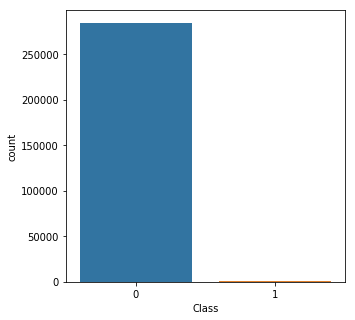

In [11]:
fig, axs = plt.subplots(figsize = (5,5))
sns.countplot(x="Class", data=df)


[Text(0, 0.5, 'Percent')]

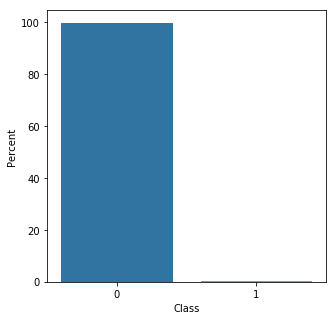

In [12]:
fig, axs = plt.subplots(figsize = (5,5))
ax = sns.barplot(x="Class", y="Class", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

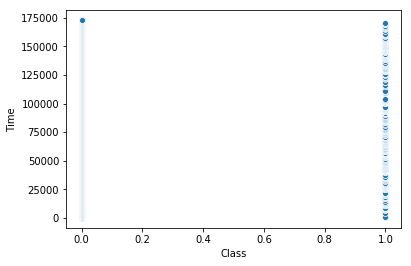

In [13]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x="Class", y="Time", data=df)

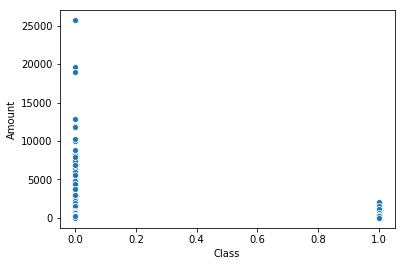

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Class", y="Amount", data=df)



### CORRELATION -HEATMAP

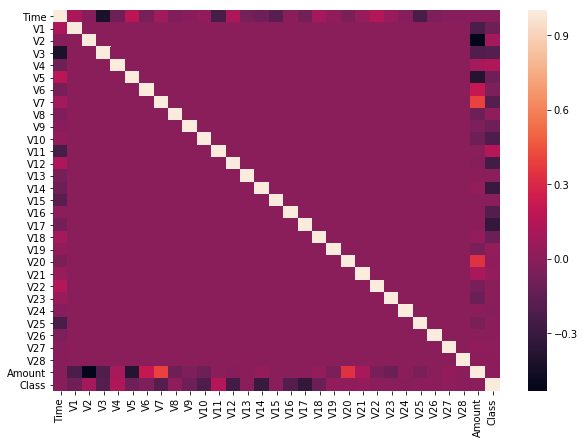

In [15]:
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr())
plt.show()
#sns.heatmap(df_highvalue_cust.corr())

In [16]:
# Drop unnecessary columns

In [17]:
df_imbal= df.drop(['Time'],axis=1)
df_imbal.shape

(284807, 30)

Time features is of not that much importance. Hence CoUld be dropped

### Splitting the data into train & test data

In [18]:
from sklearn.model_selection import train_test_split

y=df_imbal['Class'] #class variable
X=df_imbal.drop(['Class'],axis=1)

In [19]:
from sklearn import model_selection

X_train, X_test, y_train, y_test =  train_test_split(X, y ,
                                                    train_size=0.7,
                                                    test_size = 0.3,
                                                    random_state=100)

In [20]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,3.021936,-0.953080,2.523534,1.642896,0.223514,-0.059052,0.630296,-0.664479,-0.614659,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,0.26
190214,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,0.610062,1.214313,0.521753,0.351972,-0.676072,0.208449,-0.738125,-0.275378,0.612126,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,1.29
130590,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,-0.311041,-1.048697,0.620637,-0.406962,1.014342,0.189104,-0.129896,0.835635,-0.120798,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,71.99
247916,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,-0.183169,0.161022,0.112076,-1.092514,-0.231143,0.111046,0.566802,-0.491726,-0.501441,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,0.89
55518,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,1.635221,0.595421,-0.843761,0.467763,0.944421,0.460752,-0.391411,-0.042388,-0.463772,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,5.99


In [21]:
X_train.shape

(199364, 29)

In [22]:
X_test.shape

(85443, 29)

#### Preserving X_test[Amount] 

In [23]:
X_test['Amount'].describe()

count    85443.000000
mean        87.028563
std        250.746101
min          0.000000
25%          5.520000
50%         21.900000
75%         76.070000
max      25691.160000
Name: Amount, dtype: float64

In [24]:
test_amount_df=X_test['Amount'].copy()

In [25]:
test_amount_df.describe()

count    85443.000000
mean        87.028563
std        250.746101
min          0.000000
25%          5.520000
50%         21.900000
75%         76.070000
max      25691.160000
Name: Amount, dtype: float64

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [26]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

In [27]:
# plot the histogram of a variable from the dataset to see the skewness

In [28]:
X.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

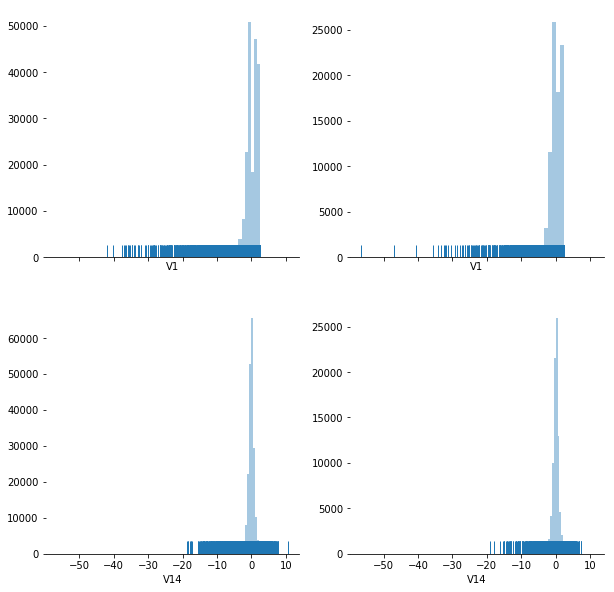

In [29]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.distplot(X_train['V1'], kde=False, rug=True,ax=axes[0,0]);
sns.distplot(X_test['V1'], kde=False, rug=True,ax=axes[0,1]);
sns.distplot(X_train['V14'], kde=False, rug=True,ax=axes[1,0]);
sns.distplot(X_test['V14'], kde=False, rug=True,ax=axes[1,1]);


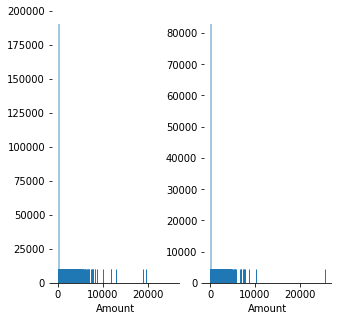

In [30]:
# Set up the matplotlib figure
f, axes = plt.subplots(1,2, figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.distplot(X_train['Amount'], kde=False, rug=True,ax=axes[0]);
sns.distplot(X_test['Amount'], kde=False, rug=True,ax=axes[1]);


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [31]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [32]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(copy=False)

In [33]:
print(pt.fit(X_train))

PowerTransformer(copy=False, method='yeo-johnson', standardize=True)


In [34]:
print(pt.transform(X_train))

[[ 0.59847004 -0.07663472  0.41436418 ... -0.18048148 -0.02782542
  -1.8534669 ]
 [ 1.44556451 -0.13437333 -0.90268967 ... -0.2060558  -0.22088604
  -1.44666202]
 [ 0.84304949 -0.98741143 -0.65297019 ...  0.09939728  0.10789915
   0.70649056]
 ...
 [-1.08183925 -0.41771323 -0.33444227 ... -0.61867143  0.23464063
   1.89544803]
 [-0.46037622  0.58231303  0.03161119 ... -0.73313856  0.06488077
  -1.268556  ]
 [ 0.16855185 -0.62610289  0.85576608 ...  0.1228928   0.23395345
   1.36337636]]


In [35]:
print(pt.transform(X_test))

[[ 0.65868887 -0.23327558 -0.5608948  ...  0.13237704  0.06713176
  -1.268556  ]
 [ 1.40742355 -0.14081654 -1.74859321 ... -0.14738456 -0.12302681
  -0.63038742]
 [ 0.09662144 -0.93897071  0.53153202 ... -0.23461413  0.17389761
   1.50617595]
 ...
 [-1.6272232  -0.72991207  0.30339367 ...  1.79570829  0.83532569
   1.61121607]
 [-0.10017992  0.69444611  0.02021457 ... -0.02658043  0.03453504
  -1.60928514]
 [ 1.30344261 -0.73791418 -1.29304509 ... -0.09919904 -0.13758938
   0.69059443]]


In [36]:
# plot the histogram of a variable from the dataset again to see the result 

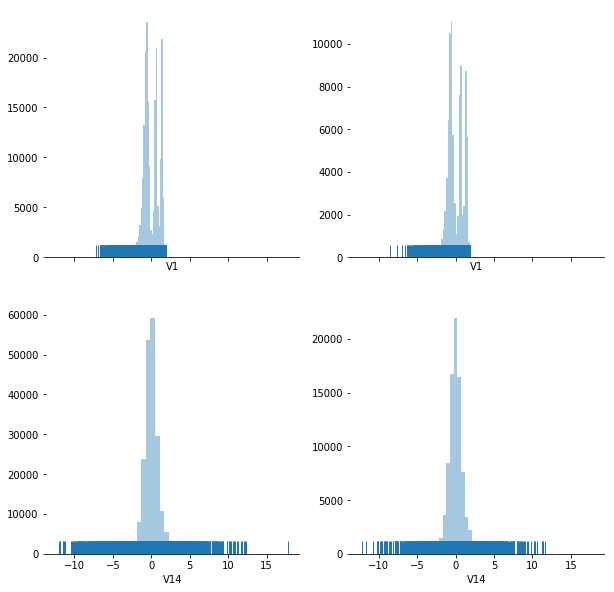

In [37]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.distplot(X_train['V1'], kde=False, rug=True,ax=axes[0,0]);
sns.distplot(X_test['V1'], kde=False, rug=True,ax=axes[0,1]);
sns.distplot(X_train['V14'], kde=False, rug=True,ax=axes[1,0]);
sns.distplot(X_test['V14'], kde=False, rug=True,ax=axes[1,1]);


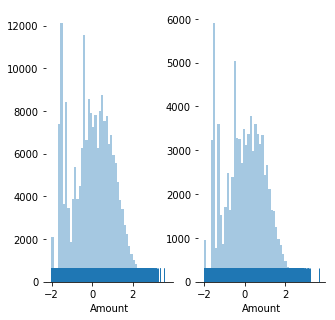

In [38]:
# Set up the matplotlib figure
f, axes = plt.subplots(1,2, figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.distplot(X_train['Amount'], kde=False, rug=True,ax=axes[0]);
sns.distplot(X_test['Amount'], kde=False, rug=True,ax=axes[1]);


In [39]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,-0.468132,2.711653,-1.044975,2.490859,1.988839,0.192412,-0.153792,0.752506,-0.799254,-0.752043,-0.142787,-0.217742,-0.215110,0.229615,-0.518220,-0.140181,1.711153,-0.180481,-0.027825,-1.853467
190214,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,0.257359,0.627815,1.546125,0.529601,0.317871,-0.765034,0.165528,-0.886526,-0.347125,0.754667,-0.220963,-0.355324,-0.881595,0.418801,-0.841362,-0.510193,0.511993,-0.206056,-0.220886,-1.446662
130590,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,1.315947,-0.265160,-1.117650,0.627704,-0.502524,1.139137,0.141712,-0.192826,1.001148,-0.138704,-0.090662,-0.009865,0.104342,-0.203779,1.917859,0.990486,0.014536,0.099397,0.107899,0.706491
247916,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,-0.479100,-0.135555,0.007221,0.121092,-1.148253,-0.307278,0.046717,0.670351,-0.599578,-0.610739,0.173877,-0.457294,-1.012077,0.252022,1.861162,-0.857357,0.288656,0.854371,0.473371,-1.576187
55518,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,0.107031,1.543871,0.577842,-0.847218,0.455308,1.052225,0.485489,-0.496743,-0.071757,-0.563810,-0.222159,0.013937,-0.092414,0.225649,0.287704,-0.037162,0.529867,-0.020486,0.051746,-0.715547


In [40]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,0.658689,-0.233276,-0.560895,0.369676,1.319280,2.555125,-0.741600,1.063597,0.711001,-0.095232,-0.828848,0.306255,-0.253320,-0.371748,-0.855520,-0.314360,-0.435584,-0.014002,0.591853,-0.076324,-0.221009,-0.414727,-0.219108,1.954270,1.710725,-0.512722,0.132377,0.067132,-1.268556
154704,1.407424,-0.140817,-1.748593,-0.025081,1.966521,2.175507,-0.544233,0.730088,1.695301,-0.974184,1.097030,-2.004819,1.248858,-0.141118,-0.825584,-0.067886,2.468963,0.381756,-0.547158,-0.192581,-0.241112,-0.143108,0.130718,0.969659,0.160017,1.254289,-0.147385,-0.123027,-0.630387
67247,0.096621,-0.938971,0.531532,0.346459,-1.053717,0.388041,-0.419957,0.233140,0.958128,-0.377715,1.113745,1.044915,-1.105159,-0.139909,-0.710575,-0.303358,0.345974,-0.584381,0.292725,0.566168,0.058740,-0.544458,-0.216084,0.412355,-0.299816,1.725113,-0.234614,0.173898,1.506176
251657,1.522070,-0.158956,-1.050062,0.196123,0.261972,-0.349599,0.084866,-0.282835,0.655353,0.119447,-1.765857,-0.314866,-0.200860,0.266315,0.180992,0.109783,-0.718288,-0.680176,0.586084,-0.295822,-0.491068,-1.237037,0.352663,-1.630590,-0.397150,0.628529,-0.205181,-0.215216,-1.541291
201903,0.113947,1.083883,-1.467842,3.067119,1.595326,-0.314158,0.875044,-0.318009,-1.929774,0.892192,-0.241852,-1.086679,0.478501,-2.535899,0.190638,0.348483,3.497318,1.323253,0.822159,0.322130,-0.029732,0.359377,0.612500,0.498160,-0.667617,0.958808,0.415974,0.026197,0.209908


In [41]:
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))


Train and test sizes, respectively: 199364 199364 | 85443 85443
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 142 0.001661926664559999
Number of frauds on y_train: 350 0.001755582753155033


## Model Building
- Build different models on the imbalanced dataset and see the result

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### Function to draw ROC curve

In [43]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

#### Function to get model evaluation metrics


In [44]:
def getModelMetrics(actual_fraud,pred_fraud,fraud_prob):

    confusion = metrics.confusion_matrix(actual_fraud, pred_fraud)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("***SKLEARN METRICS***")
    print ("ROC_AUC Score: %f" % metrics.roc_auc_score(actual_fraud, fraud_prob))
    # sklearn accuracy score value 
    print('sklearn accuracy score value: {}'.format(metrics.accuracy_score(actual_fraud, pred_fraud )))
    # sklearn recall score value 
    print('sklearn recall score value: {}'.format(metrics.recall_score(actual_fraud, pred_fraud )))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_fraud, pred_fraud )))
    # sklearn F1 score value 
    print('sklearn F1 score value: {}'.format(metrics.f1_score(actual_fraud, pred_fraud )))

### Finding optimal cut off  from accuracy, sensitivity, specificity curve

In [45]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as fraud/non-fraud
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.fraud_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.fraud, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

### Function to fit the model

In [46]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    #Print model report:
    print ("\nModel Report")
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print("Precision: %.4g" % metrics.precision_score(y_train, dtrain_predictions))
    
    
    #Perform cross-validation:
    #if performCV:
        #cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
        #print("Mean _score: %.2f%%" % (cv_score.mean()*100.0))
        #print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))#

### Funtion to predict the fraud using the input probability cut-off

In [47]:
def predictFraudWithProb(model,X,y,prob):
    # Funtion to predict the fraud using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'fraud':y, 'fraud_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if fraud_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.fraud_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the metrices
    getModelMetrics(y_df.fraud,y_df.final_predicted,y_df.fraud_Prob)
    return y_df

## Logistic Regression - Imbalanced

In [48]:
logistic_reg=LogisticRegression()

modelfit(logistic_reg,X_train, y_train)



Model Report
AUC Score (Train): 0.984591
Accuracy : 0.9993
Recall/Sensitivity : 0.7
Precision: 0.9041


In [49]:
# make predictions
pred_probs_test = logistic_reg.predict(X_test)
pred_proba=logistic_reg.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.967176
sklearn accuracy score value: 0.9991807403766253
sklearn recall score value: 0.6549295774647887
sklearn precision score value: 0.8157894736842105
sklearn F1 score value: 0.7265625000000001


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### StratifiedKFold Cross Validation

In [50]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(logistic_reg,X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.98314


In [51]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]
    #model
    logistic_reg.fit(X_train_cv,y_train_cv)
    score = metrics.roc_auc_score(y_test_cv,logistic_reg.predict_proba(X_test_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = logistic_reg.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))   

1 of KFold 5
ROC AUC score: 0.9780946159837198
2 of KFold 5
ROC AUC score: 0.9917170636814885
3 of KFold 5
ROC AUC score: 0.9783939473334746
4 of KFold 5
ROC AUC score: 0.9867152870745565
5 of KFold 5
ROC AUC score: 0.9807931403303496

mean_auc_score: 0.98314


In [52]:
y_test.shape

(85443,)

In [53]:
pred_test_full.shape

(85443,)

### Predicting on test data

In [54]:
pred_probs = pred_test_full/5
y_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_df['final_predicted'] = y_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

#### EVALUATION METRICES

In [55]:
# Let's see the metrices
getModelMetrics(y_df.fraud,y_df.final_predicted,y_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.966977
sklearn accuracy score value: 0.9991807403766253
sklearn recall score value: 0.6549295774647887
sklearn precision score value: 0.8157894736842105
sklearn F1 score value: 0.7265625000000001


##### perform hyperparameter tuning

#### print the evaluation result by choosing a evaluation metric

#### print the optimum value of hyperparameters

#### HYPER PARAMETER TUNING -LOGISTIC REGRESSION=IMBALANCED

In [56]:
num_C = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5] #--> list of values
cv_num =10 #--> list of values

In [57]:
#Grid Search
logreg = LogisticRegression(class_weight='balanced')
#param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5]}
param= {'C' : num_C}
clf = RandomizedSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=cv_num)
clf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.9828, with best C: {'C': 0.001}


In [58]:
best_C_value=clf.best_params_.get('C')
print(best_C_value)

0.001


In [59]:
logistic_hpt=LogisticRegression(class_weight='balanced',C=best_C_value)
logistic_hpt.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### TRAINING METRICES

In [60]:
# make predictions
pred_train = logistic_hpt.predict(X_train)
pred_proba_train=logistic_hpt.predict_proba(X_train)[:,1]
#Let's check the model metrices.
getModelMetrics(y_train,pred_train,pred_proba_train)

***SKLEARN METRICS***
ROC_AUC Score: 0.989728
sklearn accuracy score value: 0.9792991713649405
sklearn recall score value: 0.9228571428571428
sklearn precision score value: 0.073027356997513
sklearn F1 score value: 0.13534464697255394


### TESTING METRICES

In [61]:
# make predictions
pred_test = logistic_hpt.predict(X_test)
pred_proba_test=logistic_hpt.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.970867
sklearn accuracy score value: 0.9785822127032057
sklearn recall score value: 0.8661971830985915
sklearn precision score value: 0.06359875904860393
sklearn F1 score value: 0.1184971098265896


### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost

### Decision tree- Imbalanced

In [62]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=10)
modelfit(dt0, X_train, y_train)


Model Report
AUC Score (Train): 0.995071
Accuracy : 0.9818
Recall/Sensitivity : 0.9686
Precision: 0.08563


In [63]:
# make predictions
pred_probs_test = dt0.predict(X_test)
pred_proba=dt0.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.889855
sklearn accuracy score value: 0.9801622134054282
sklearn recall score value: 0.8028169014084507
sklearn precision score value: 0.06400898371701291
sklearn F1 score value: 0.11856474258970358


### StratifiedKfold Cross Validation

In [64]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dt0,X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.90199


In [65]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]
    
    #model

    dt0.fit(X_train_cv,y_train_cv)
    score = metrics.roc_auc_score(y_test_cv,dt0.predict_proba(X_test_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = dt0.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))

1 of KFold 5
ROC AUC score: 0.9232590149342657
2 of KFold 5
ROC AUC score: 0.8770227298014148
3 of KFold 5
ROC AUC score: 0.8874458493796231
4 of KFold 5
ROC AUC score: 0.9310028676948258
5 of KFold 5
ROC AUC score: 0.8912062925768267

mean_auc_score: 0.90199


### Predicting on test data

In [66]:
pred_probs = pred_test_full/5
y_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_df['final_predicted'] = y_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation Metrices

In [67]:
# Let's see the head
getModelMetrics(y_df.fraud,y_df.final_predicted,y_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.932097
sklearn accuracy score value: 0.9132287021757195
sklearn recall score value: 0.8732394366197183
sklearn precision score value: 0.01648936170212766
sklearn F1 score value: 0.0323675280605586


### Hyper parameter Tuning

In [68]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(10, 200, 20),
    'min_samples_split': range(50, 200, 20),
    'max_features': [8,10,12,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = dt, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc")

In [69]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(10, 200, 20), 'min_samples_split': range(50, 200, 20), 'max_features': [8, 10, 12, 15]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

In [70]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.924731785769231 using {'min_samples_split': 130, 'min_samples_leaf': 30, 'max_features': 12, 'max_depth': 5}


In [71]:
max_depth_best=grid_search.best_params_.get('max_depth')
print(max_depth_best)
min_samples_leaf_best=grid_search.best_params_.get('min_samples_leaf')
print(min_samples_leaf_best)
min_samples_split_best=grid_search.best_params_.get('min_samples_split')
print(min_samples_split_best)
max_features_best=grid_search.best_params_.get('max_features')
print(max_features_best)

5
30
130
12


#### Hypertuned Model

In [72]:
### MODEL FIT with optimal hyper parameters

# model with the best hyperparameters
dt_hpt = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=max_depth_best,
                             min_samples_leaf=min_samples_leaf_best, 
                             min_samples_split=min_samples_split_best,
                             max_features=max_features_best,
                             random_state=10)

In [73]:
dt_hpt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=130,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

### TRAINING METRICES

In [74]:
# make predictions
pred_train = dt_hpt.predict(X_train)
pred_proba_train=dt_hpt.predict_proba(X_train)[:,1]
#Let's check the model metrices.
getModelMetrics(y_train,pred_train,pred_proba_train)

***SKLEARN METRICS***
ROC_AUC Score: 0.988075
sklearn accuracy score value: 0.9756174635340382
sklearn recall score value: 0.9628571428571429
sklearn precision score value: 0.06499517839922854
sklearn F1 score value: 0.12177055103884371


### TESTING METRICES

In [75]:
# make predictions
pred_test = dt_hpt.predict(X_test)
pred_proba_test=dt_hpt.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.888340
sklearn accuracy score value: 0.9740411736479291
sklearn recall score value: 0.8169014084507042
sklearn precision score value: 0.05025996533795494
sklearn F1 score value: 0.0946938775510204


### Random Forest - Imbalanced

In [76]:
rf0=RandomForestClassifier(class_weight='balanced',
                             max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features='auto',
                             random_state=10)
modelfit(rf0, X_train, y_train)


Model Report
AUC Score (Train): 0.999708
Accuracy : 0.999
Recall/Sensitivity : 0.9743
Precision: 0.6338


In [77]:
# make predictions
pred_probs_test = rf0.predict(X_test)
pred_proba=rf0.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.956880
sklearn accuracy score value: 0.9982912584998186
sklearn recall score value: 0.8028169014084507
sklearn precision score value: 0.49137931034482757
sklearn F1 score value: 0.6096256684491979


### StratifiedKFold Cross Validation

In [78]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rf0,X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.96806


In [79]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]
    #print(X_train_cv)
    #print(X_test_cv)
    #print(y_train_cv)
    #print(y_test_cv)
    #model
    rf0.fit(X_train_cv,y_train_cv)
    score = metrics.roc_auc_score(y_test_cv,rf0.predict_proba(X_test_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = rf0.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))   

1 of KFold 5
ROC AUC score: 0.9663119434644195
2 of KFold 5
ROC AUC score: 0.9784743432835287
3 of KFold 5
ROC AUC score: 0.9498008046773215
4 of KFold 5
ROC AUC score: 0.9655094196058444
5 of KFold 5
ROC AUC score: 0.9801826182460323

mean_auc_score: 0.96806


### Predicting on test data

In [80]:
pred_probs = pred_test_full/5
y_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_df['final_predicted'] = y_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

#### Evaluation Metrices

In [81]:
# Let's see the metrices
getModelMetrics(y_df.fraud,y_df.final_predicted,y_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.970408
sklearn accuracy score value: 0.9984551104244935
sklearn recall score value: 0.8098591549295775
sklearn precision score value: 0.5227272727272727
sklearn F1 score value: 0.6353591160220995


### Hyper parameter Tuning

In [82]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(10, 100, 20),
    'min_samples_split': range(50, 200, 50),
    'max_features': [8,10,12,15]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                            #cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc")
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                            cv = 3, n_jobs = -1,verbose = 1,scoring="roc_auc")

In [83]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=10, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(10, 100, 20), 'min_samples_split': range(50, 200, 50), 'max_features': [8, 10, 12, 15]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

In [84]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.9685409747986531 using {'min_samples_split': 150, 'min_samples_leaf': 70, 'max_features': 15, 'max_depth': 5}


In [85]:
max_depth_best=grid_search.best_params_.get('max_depth')
print(max_depth_best)
min_samples_leaf_best=grid_search.best_params_.get('min_samples_leaf')
print(min_samples_leaf_best)
min_samples_split_best=grid_search.best_params_.get('min_samples_split')
print(min_samples_split_best)
max_features_best=grid_search.best_params_.get('max_features')
print(max_features_best)

5
70
150
15


In [86]:
# model with the best hyperparameters
rf_hpt = RandomForestClassifier(class_weight='balanced',
                             max_depth=max_depth_best,
                             min_samples_leaf=min_samples_leaf_best, 
                             min_samples_split=min_samples_split_best,
                             max_features=max_features_best,
                             random_state=10)

In [87]:
rf_hpt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=70,
            min_samples_split=150, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

### TRAINING METRICES

In [88]:
# make predictions
pred_train = rf_hpt.predict(X_train)
pred_proba_train=rf_hpt.predict_proba(X_train)[:,1]
#Let's check the model metrices.
getModelMetrics(y_train,pred_train,pred_proba_train)

***SKLEARN METRICS***
ROC_AUC Score: 0.991187
sklearn accuracy score value: 0.9976826307658354
sklearn recall score value: 0.92
sklearn precision score value: 0.42592592592592593
sklearn F1 score value: 0.5822784810126582


### TESTING METRICES

In [89]:
# make predictions
pred_test = rf_hpt.predict(X_test)
pred_proba_test=rf_hpt.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.958211
sklearn accuracy score value: 0.9971794061538102
sklearn recall score value: 0.8098591549295775
sklearn precision score value: 0.3495440729483283
sklearn F1 score value: 0.4883227176220806


### XGBOOST -Imbalanced

In [90]:
modelxgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      min_child_weight=6,
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=.01)

modelfit(modelxgb,X_train, y_train)


Model Report
AUC Score (Train): 0.938668
Accuracy : 0.9995
Recall/Sensitivity : 0.7371
Precision: 0.9451


In [91]:
# make predictions
pred_probs_test = modelxgb.predict(X_test)
pred_proba=modelxgb.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.920827
sklearn accuracy score value: 0.9992158515033414
sklearn recall score value: 0.6830985915492958
sklearn precision score value: 0.8151260504201681
sklearn F1 score value: 0.7432950191570882


### StratifiedKFold Cross Validation

In [92]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(modelxgb,X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('mean auc_score: %.5f' % score)

mean auc_score: 0.93109


In [93]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]
    #model
    modelxgb.fit(X_train_cv,y_train_cv)
    score = metrics.roc_auc_score(y_test_cv,modelxgb.predict_proba(X_test_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = modelxgb.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))   

1 of KFold 5
ROC AUC score: 0.9411178626162421
2 of KFold 5
ROC AUC score: 0.9270238065328888
3 of KFold 5
ROC AUC score: 0.9044628725042262
4 of KFold 5
ROC AUC score: 0.9341835324688376
5 of KFold 5
ROC AUC score: 0.9486624864507884

mean_auc_score: 0.93109


### Predicting on test data

In [94]:
pred_probs = pred_test_full/5
y_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_df['final_predicted'] = y_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation Metrices

In [95]:
# Let's see the head
getModelMetrics(y_df.fraud,y_df.final_predicted,y_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.912107
sklearn accuracy score value: 0.001661926664559999
sklearn recall score value: 1.0
sklearn precision score value: 0.001661926664559999
sklearn F1 score value: 0.0033183384938949576


### HYper parameter Tuning

In [96]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'max_depth':range(3,15,2),
     'min_child_weight':[1,4,6,8,10,12],
     #'subsample' :[i/10.0 for i in range(6,10)],
     #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
     'gamma':[i/10.0 for i in range(1,5)]}
     #'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]}
# Create a based model
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      min_child_weight=6,
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, 
                            cv = 3, n_jobs = 4,verbose = 1,scoring="roc_auc")

In [97]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=10,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': range(3, 15, 2), 'min_child_weight': [1, 4, 6, 8, 10, 12], 'gamma': [0.1, 0.2, 0.3, 0.4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

In [98]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9796753700553681 using {'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3}


In [99]:
learning_rate_best=grid_search.best_params_.get('learning_rate')
max_depth_best=grid_search.best_params_.get('max_depth')
min_child_weight_best=grid_search.best_params_.get('min_child_weight')
#subsample_best=grid_search.best_params_.get('subsample')
#reg_alpha_best=grid_search.best_params_.get('reg_alpha')
gamma_best=grid_search.best_params_.get('gamma')
#colsample_bytree_best=grid_search.best_params_.get('colsample_bytree')



In [100]:
model_xgb_hpt = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                     learning_rate=learning_rate_best,  
                     colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      min_child_weight=min_child_weight_best,
                      reg_alpha = 0.3,
                      max_depth=max_depth_best, 
                      gamma=gamma_best)


In [101]:
model_xgb_hpt.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=4, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8, verbosity=1)

### TRAINING METRICES

In [102]:
# make predictions
pred_train = model_xgb_hpt.predict(X_train)
pred_proba_train=model_xgb_hpt.predict_proba(X_train)[:,1]
#Let's check the model metrices.
getModelMetrics(y_train,pred_train,pred_proba_train)

***SKLEARN METRICS***
ROC_AUC Score: 0.999967
sklearn accuracy score value: 0.9998144098232379
sklearn recall score value: 0.8971428571428571
sklearn precision score value: 0.9968253968253968
sklearn F1 score value: 0.944360902255639


### TESTING METRICES

In [103]:
# make predictions
pred_test = model_xgb_hpt.predict(X_test)
pred_proba_test=model_xgb_hpt.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.982383
sklearn accuracy score value: 0.9994967405170698
sklearn recall score value: 0.7605633802816901
sklearn precision score value: 0.9230769230769231
sklearn F1 score value: 0.833976833976834


## BEST MODEL ON IMBALANCED DATA

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

#### XGBOOST- HYPER PARAMETER TUNED gives the best results for Imbalanced data

In [104]:
clf = model_xgb_hpt  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=4, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8, verbosity=1)

### TRAINING METRICES

In [105]:
# make predictions
pred_train = clf.predict(X_train)
pred_proba_train=clf.predict_proba(X_train)[:,1]
#Let's check the model metrices.
getModelMetrics(y_train,pred_train,pred_proba_train)

***SKLEARN METRICS***
ROC_AUC Score: 0.999967
sklearn accuracy score value: 0.9998144098232379
sklearn recall score value: 0.8971428571428571
sklearn precision score value: 0.9968253968253968
sklearn F1 score value: 0.944360902255639


### TESTING METRICES

In [106]:
# make predictions
pred_test = clf.predict(X_test)
pred_proba_test=clf.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.982383
sklearn accuracy score value: 0.9994967405170698
sklearn recall score value: 0.7605633802816901
sklearn precision score value: 0.9230769230769231
sklearn F1 score value: 0.833976833976834


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 16


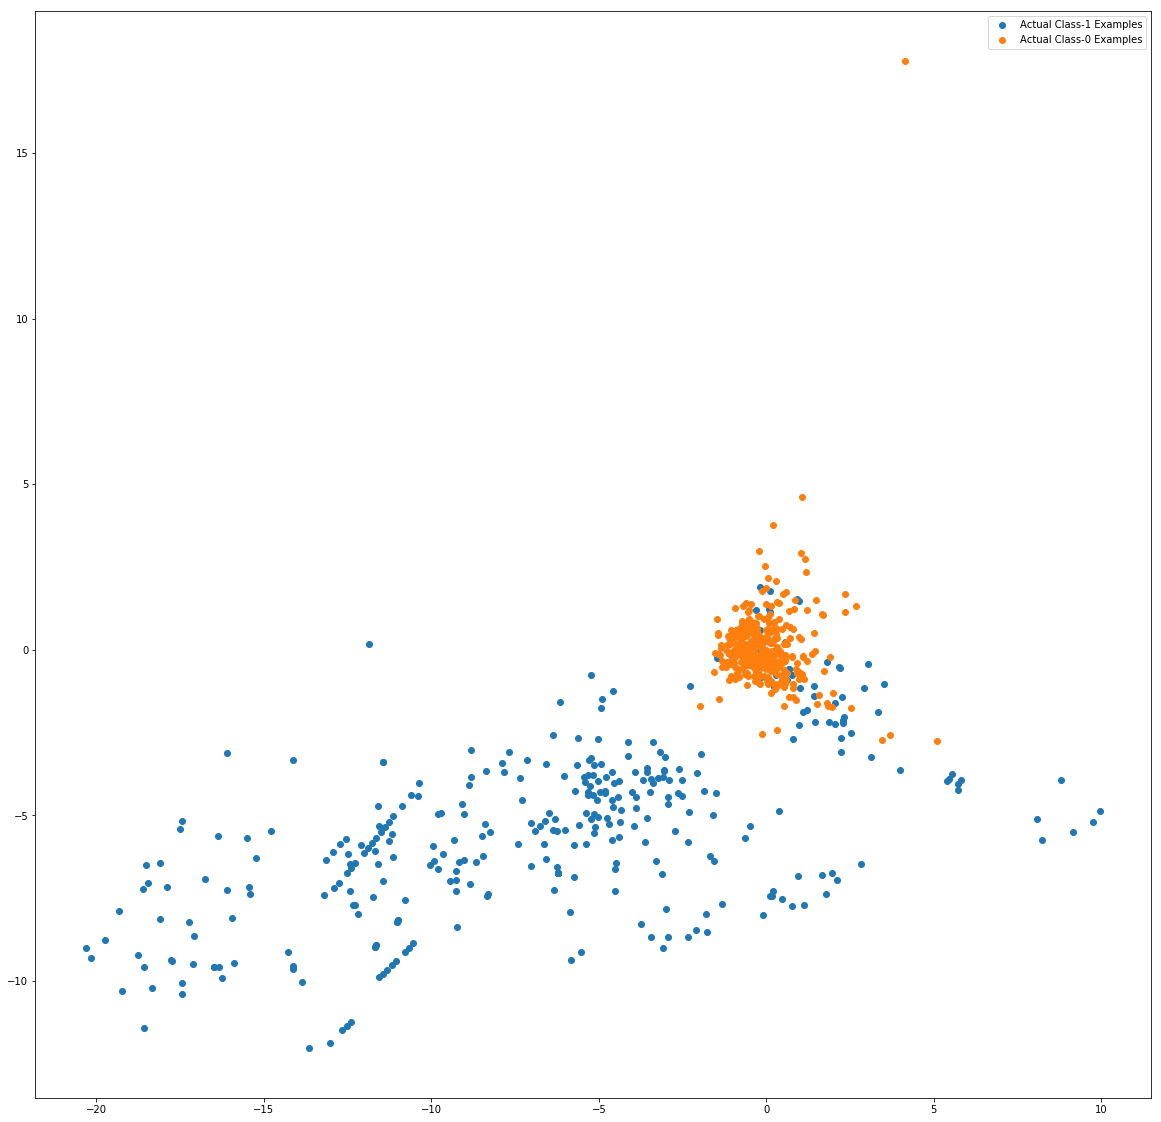

In [107]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### DRAW ROC CURVE with best model

#### Print the FPR,TPR & select the best threshold from the roc curve

In [108]:
print('Train auc =', metrics.roc_auc_score(y_train,clf.predict_proba(X_train)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train,clf.predict_proba(X_train)[:,1])
best_threshold = thresholds[np.argmax(tpr-fpr)]
print(best_threshold)

Train auc = 0.9999670231383577
0.020791147


In [109]:
# predicting fraud with default cut-off 0.5
cut_off_prob = best_threshold
y_train_df = predictFraudWithProb(clf,X_train,y_train,cut_off_prob)
y_train_df.head()

***SKLEARN METRICS***
ROC_AUC Score: 0.999967
sklearn accuracy score value: 0.9990620172147429
sklearn recall score value: 0.9942857142857143
sklearn precision score value: 0.6529080675422139
sklearn F1 score value: 0.7882219705549264


,fraud,fraud_Prob,final_predicted
7610,0,0.000192,0
190214,0,0.000025,0
130590,0,0.000010,0
247916,0,0.000058,0
55518,0,0.000015,0


     prob  accuracy     sensi     speci
0.0   0.0  0.001756  1.000000  0.000000
0.1   0.1  0.999799  0.960000  0.999869
0.2   0.2  0.999829  0.934286  0.999945
0.3   0.3  0.999839  0.925714  0.999970
0.4   0.4  0.999845  0.920000  0.999985
0.5   0.5  0.999814  0.897143  0.999995
0.6   0.6  0.999779  0.874286  1.000000
0.7   0.7  0.999749  0.857143  1.000000
0.8   0.8  0.999704  0.831429  1.000000
0.9   0.9  0.999629  0.788571  1.000000


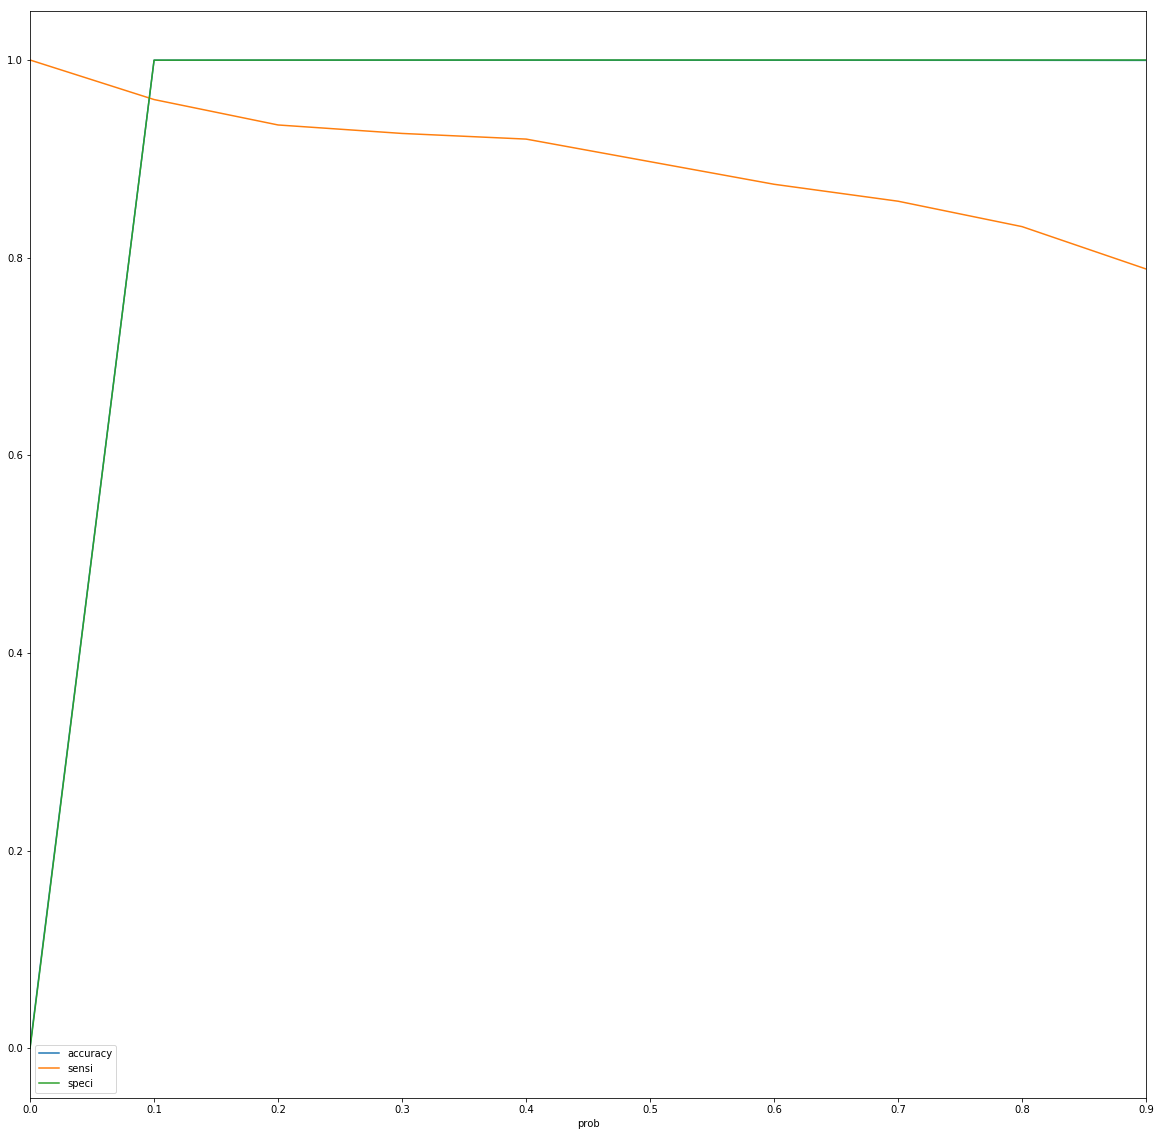

In [110]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [111]:
# predicting fraud with default cut-off 0.5
cut_off_prob = best_threshold
y_train_df = predictFraudWithProb(clf,X_train,y_train,cut_off_prob)
y_train_df.head()

***SKLEARN METRICS***
ROC_AUC Score: 0.999967
sklearn accuracy score value: 0.9990620172147429
sklearn recall score value: 0.9942857142857143
sklearn precision score value: 0.6529080675422139
sklearn F1 score value: 0.7882219705549264


,fraud,fraud_Prob,final_predicted
7610,0,0.000192,0
190214,0,0.000025,0
130590,0,0.000010,0
247916,0,0.000058,0
55518,0,0.000015,0


In [112]:
#Lets see how it performs on test data.
y_test_df= predictFraudWithProb(clf,X_test,y_test,cut_off_prob)
y_test_df.head()

***SKLEARN METRICS***
ROC_AUC Score: 0.982383
sklearn accuracy score value: 0.9986072586402631
sklearn recall score value: 0.8380281690140845
sklearn precision score value: 0.5534883720930233
sklearn F1 score value: 0.6666666666666667


,fraud,fraud_Prob,final_predicted
49089,0,0.000056,0
154704,0,0.000040,0
67247,0,0.000024,0
251657,0,0.000020,0
201903,0,0.001589,0


In [113]:
confusion = metrics.confusion_matrix(y_test_df.fraud,y_test_df.final_predicted)
print(confusion)

[[85205    96]
 [   23   119]]


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building -- Balanced
- Build different models on the balanced dataset and see the result

### Models on balanced dataset using:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

In [114]:
# Logistic Regression
#from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

## Random Oversampling

In [115]:
from imblearn import over_sampling #- 
from imblearn.over_sampling import RandomOverSampler

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [116]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [117]:
X_train.shape

(199364, 29)

In [118]:
y_train.shape

(199364,)

In [119]:
X_train_over.shape

(398028, 29)

In [120]:
y_train_over.shape

(398028,)

In [121]:
X_train_over = pd.DataFrame(X_train_over, columns=X_train.columns)

In [122]:
print("% Fraud before oversampling:",(np.sum(y_train))/len(y_train)*100)
print("% Fraud after oversampling:",(np.sum(y_train_over))/len(y_train_over)*100)

% Fraud before oversampling: 0.1755582753155033
% Fraud after oversampling: 50.0


In [123]:
y_train_over_df = pd.DataFrame(y_train_over)

In [124]:
y_train_over_df.head()

,0
0,0
1,0
2,0
3,0
4,0


### Logistic Regression- Oversampling

In [125]:
log_reg_over=LogisticRegression(class_weight='balanced',C=0.05)
modelfit(log_reg_over,X_train_over, y_train_over)


Model Report
AUC Score (Train): 0.989925
Accuracy : 0.951
Recall/Sensitivity : 0.9258
Precision: 0.975


In [126]:
# make predictions
pred_probs_test = log_reg_over.predict(X_test)
pred_proba=log_reg_over .predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.973236
sklearn accuracy score value: 0.9751647297028428
sklearn recall score value: 0.8943661971830986
sklearn precision score value: 0.05684870188003581
sklearn F1 score value: 0.1069023569023569


### StratifiedKFold Cross Validation

In [127]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(log_reg_over,X_train_over, y_train_over_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.3f' % score)

auc_score: 0.990


In [128]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_over_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_over,y_train_over_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_over_cv,X_test_over_cv = X_train_over.loc[train_index],X_train_over.loc[test_index]
    y_train_over_cv,y_test_over_cv = y_train_over_df.loc[train_index],y_train_over_df.loc[test_index]
    log_reg_over.fit(X_train_over_cv,y_train_over_cv)
    score = metrics.roc_auc_score(y_test_over_cv,log_reg_over.predict_proba(X_test_over_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_over = log_reg_over.predict_proba(X_test)[:,1]
    pred_test_over_full +=pred_test_over
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9899270615062554
2 of KFold 5
ROC AUC score: 0.9901742806180526
3 of KFold 5
ROC AUC score: 0.9897967252303252
4 of KFold 5
ROC AUC score: 0.9897232129171275
5 of KFold 5
ROC AUC score: 0.9898993245548936

mean_auc_score: 0.98990


### Predicting on test data

In [129]:
pred_probs_over = pred_test_over_full/5
y_test_over_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_over})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_over_df['final_predicted'] = y_test_over_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation metrices

In [130]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_over_df.fraud,y_test_over_df.final_predicted,y_test_over_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.973325
sklearn accuracy score value: 0.8215652540290018
sklearn recall score value: 0.9577464788732394
sklearn precision score value: 0.008844953173777315
sklearn F1 score value: 0.017528031962881815


### Decision Tree- Over Sampling

In [131]:
dt_over_sm = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=150,
                             min_samples_leaf=10,
                             max_depth=8,
                             random_state=10)
modelfit(dt_over_sm, X_train_over, y_train_over)


Model Report
AUC Score (Train): 0.979826
Accuracy : 0.9637
Recall/Sensitivity : 0.9348
Precision: 0.9922


In [132]:
# make predictions
pred_probs_test_over= dt_over_sm.predict(X_test)
pred_proba_test_over=dt_over_sm.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test_over,pred_proba_test_over)

***SKLEARN METRICS***
ROC_AUC Score: 0.868462
sklearn accuracy score value: 0.9913860702456608
sklearn recall score value: 0.7746478873239436
sklearn precision score value: 0.13513513513513514
sklearn F1 score value: 0.2301255230125523


### StratifiedKFold Cross Validation

In [133]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dt_over_sm,X_train_over, y_train_over_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.3f' % score)

auc_score: 0.982


In [134]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_over_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_over,y_train_over_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_over_cv,X_test_over_cv = X_train_over.loc[train_index],X_train_over.loc[test_index]
    y_train_over_cv,y_test_over_cv = y_train_over_df.loc[train_index],y_train_over_df.loc[test_index]
    dt_over_sm.fit(X_train_over_cv,y_train_over_cv)
    score = metrics.roc_auc_score(y_test_over_cv,dt_over_sm.predict_proba(X_test_over_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_over = dt_over_sm.predict_proba(X_test)[:,1]
    pred_test_over_full +=pred_test_over
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9793908235630513
2 of KFold 5
ROC AUC score: 0.9810041775292091
3 of KFold 5
ROC AUC score: 0.9891356193731681
4 of KFold 5
ROC AUC score: 0.9794469320582827
5 of KFold 5
ROC AUC score: 0.9803540937772116

mean_auc_score: 0.98187


### Predicting on test data

In [135]:
pred_probs_over = pred_test_over_full/5
y_test_over_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_over})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_over_df['final_predicted'] = y_test_over_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation metrices

In [136]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_over_df.fraud,y_test_over_df.final_predicted,y_test_over_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.919280
sklearn accuracy score value: 0.8711421649520733
sklearn recall score value: 0.8802816901408451
sklearn precision score value: 0.011243029321820471
sklearn F1 score value: 0.022202486678507993


### Random Forest on Over Sampling

In [137]:
rf_over_sm=RandomForestClassifier(class_weight='balanced',
                             max_depth=15,
                             min_samples_leaf=10, 
                             min_samples_split=150,
                             max_features='auto',
                             random_state=10)
modelfit(rf_over_sm, X_train_over, y_train_over)


Model Report
AUC Score (Train): 0.999991
Accuracy : 0.9998
Recall/Sensitivity : 1
Precision: 0.9997


In [138]:
# make predictions
pred_probs_test = rf_over_sm.predict(X_test)
pred_proba=rf_over_sm.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.921291
sklearn accuracy score value: 0.9991456292499094
sklearn recall score value: 0.7605633802816901
sklearn precision score value: 0.7346938775510204
sklearn F1 score value: 0.7474048442906575


### StratifiedKFold Cross Validation

In [139]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rf_over_sm,X_train_over, y_train_over_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.3f' % score)

auc_score: 1.000


In [140]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_over_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_over,y_train_over_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_over_cv,X_test_over_cv = X_train_over.loc[train_index],X_train_over.loc[test_index]
    y_train_over_cv,y_test_over_cv = y_train_over_df.loc[train_index],y_train_over_df.loc[test_index]
    rf_over_sm.fit(X_train_over_cv,y_train_over_cv)
    score = metrics.roc_auc_score(y_test_over_cv,rf_over_sm.predict_proba(X_test_over_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_over = rf_over_sm.predict_proba(X_test)[:,1]
    pred_test_over_full +=pred_test_over
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9999588595141022
2 of KFold 5
ROC AUC score: 0.999999213522271
3 of KFold 5
ROC AUC score: 0.9999721605188749
4 of KFold 5
ROC AUC score: 0.999972309798155
5 of KFold 5
ROC AUC score: 0.999974176858632

mean_auc_score: 0.99998


### Predicting on test data

In [141]:
pred_probs_over = pred_test_over_full/5
y_test_over_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_over})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_over_df['final_predicted'] = y_test_over_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation metrices

In [142]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_over_df.fraud,y_test_over_df.final_predicted,y_test_over_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.970564
sklearn accuracy score value: 0.9963133316948141
sklearn recall score value: 0.8309859154929577
sklearn precision score value: 0.2885085574572127
sklearn F1 score value: 0.42831215970961883


### XGBOOST-Oversampling

In [143]:
modelxgb_over =XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                     learning_rate=0.15,  
                     colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      min_child_weight=6,
                      reg_alpha = 0.3,
                      max_depth=8, 
                      gamma=0.3)

modelfit(modelxgb_over,X_train_over, y_train_over)


Model Report
AUC Score (Train): 1.000000
Accuracy : 1
Recall/Sensitivity : 1
Precision: 0.9999


In [144]:
# make predictions
pred_probs_test = modelxgb_over.predict(X_test)
pred_proba=modelxgb_over.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.977918
sklearn accuracy score value: 0.9993211848834895
sklearn recall score value: 0.8098591549295775
sklearn precision score value: 0.7876712328767124
sklearn F1 score value: 0.7986111111111112


### StratifiedKFold Cross Validation

In [145]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(modelxgb_over,X_train_over, y_train_over_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)

auc_score: 0.99999


In [146]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_over_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_over,y_train_over_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_over_cv,X_test_over_cv = X_train_over.loc[train_index],X_train_over.loc[test_index]
    y_train_over_cv,y_test_over_cv = y_train_over_df.loc[train_index],y_train_over_df.loc[test_index]
    modelxgb_over.fit(X_train_over_cv,y_train_over_cv)
    score = metrics.roc_auc_score(y_test_over_cv,modelxgb_over.predict_proba(X_test_over_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_over = modelxgb_over.predict_proba(X_test)[:,1]
    pred_test_over_full +=pred_test_over
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9999691424263695
2 of KFold 5
ROC AUC score: 0.9999970251448336
3 of KFold 5
ROC AUC score: 0.9999876082417511
4 of KFold 5
ROC AUC score: 0.9999859216699274
5 of KFold 5
ROC AUC score: 0.9999903970410025

mean_auc_score: 0.99999


### Predicting on test data

In [147]:
pred_probs_over = pred_test_over_full/5
y_test_over_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_over})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_over_df['final_predicted'] = y_test_over_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [148]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_over_df.fraud,y_test_over_df.final_predicted,y_test_over_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.983567
sklearn accuracy score value: 0.9993094811745842
sklearn recall score value: 0.8169014084507042
sklearn precision score value: 0.7785234899328859
sklearn F1 score value: 0.7972508591065293


## SMOTE

### Print the class distribution after applying SMOTE 

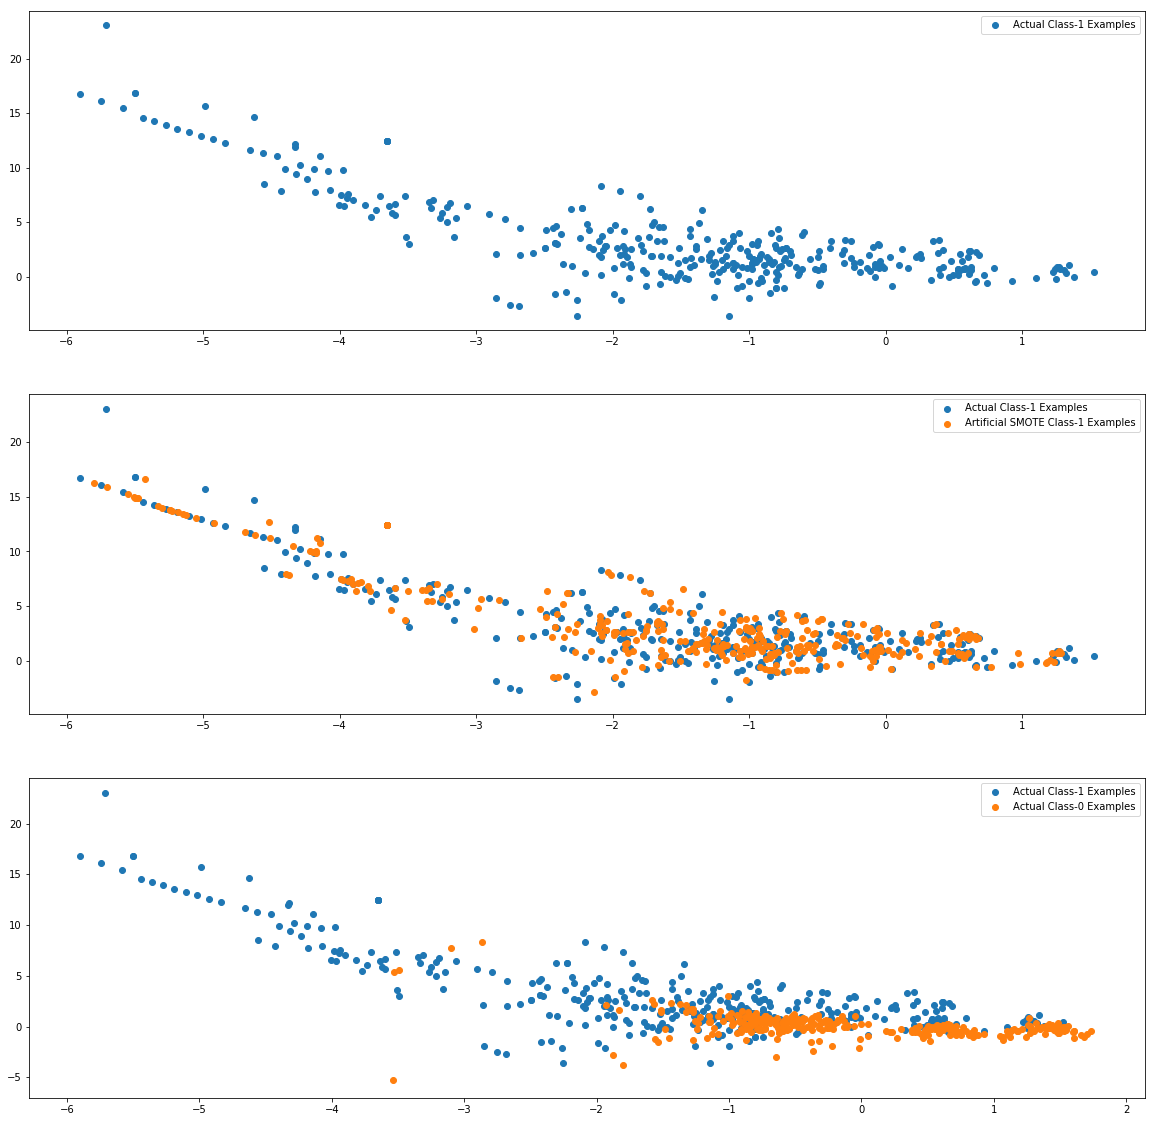

In [149]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling #-

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [150]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [151]:
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

In [152]:
print("% Fraud before oversampling:",(np.sum(y_train))/len(y_train)*100)
print("% Fraud after oversampling:",(np.sum(y_train_smote))/len(y_train_smote)*100)

% Fraud before oversampling: 0.1755582753155033
% Fraud after oversampling: 50.0


In [153]:
y_train_smote_df = pd.DataFrame(y_train_smote)

### Logistic Regression- SMOTE

In [154]:
log_reg_SMOTE=LogisticRegression(class_weight='balanced',C=0.05)
modelfit(log_reg_SMOTE,X_train_smote, y_train_smote)


Model Report
AUC Score (Train): 0.991182
Accuracy : 0.9505
Recall/Sensitivity : 0.9254
Precision: 0.9743


In [155]:
# make predictions
pred_probs_test = log_reg_SMOTE.predict(X_test)
pred_proba=log_reg_SMOTE .predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.972557
sklearn accuracy score value: 0.9746497665110073
sklearn recall score value: 0.8873239436619719
sklearn precision score value: 0.05536028119507909
sklearn F1 score value: 0.10421836228287842


### StratifiedKFold Cross Validation

In [156]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(log_reg_SMOTE,X_train_smote, y_train_smote_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.3f' % score)

auc_score: 0.991


In [157]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_smote_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_smote, y_train_smote_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_smote_cv,X_test_smote_cv = X_train_smote.loc[train_index],X_train_smote.loc[test_index]
    y_train_smote_cv,y_test_smote_cv = y_train_smote_df.loc[train_index],y_train_smote_df.loc[test_index]
    log_reg_SMOTE.fit(X_train_smote_cv,y_train_smote_cv)
    score = metrics.roc_auc_score(y_test_smote_cv,log_reg_SMOTE.predict_proba(X_test_smote_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_smote = log_reg_SMOTE.predict_proba(X_test)[:,1]
    pred_test_smote_full +=pred_test_smote
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9914291014164539
2 of KFold 5
ROC AUC score: 0.9913440014963931
3 of KFold 5
ROC AUC score: 0.9910343640782738
4 of KFold 5
ROC AUC score: 0.9910496760927134
5 of KFold 5
ROC AUC score: 0.99099189611763

mean_auc_score: 0.99117


### Predicting on test data

In [158]:
pred_probs_smote = pred_test_smote_full/5
y_test_smote_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_smote})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_smote_df['final_predicted'] = y_test_smote_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation metrices

In [159]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_smote_df.fraud,y_test_smote_df.final_predicted,y_test_smote_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.972629
sklearn accuracy score value: 0.8176328078368035
sklearn recall score value: 0.9577464788732394
sklearn precision score value: 0.008655804480651732
sklearn F1 score value: 0.017156553551154283


### Decision Tree- SMOTE

In [160]:
dt_SMOTE = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=150,
                             min_samples_leaf=10,
                             max_depth=8,
                             random_state=10)
modelfit(dt_SMOTE, X_train_over, y_train_over)


Model Report
AUC Score (Train): 0.979826
Accuracy : 0.9637
Recall/Sensitivity : 0.9348
Precision: 0.9922


In [161]:
# make predictions
pred_probs_test_over= dt_SMOTE.predict(X_test)
pred_proba_test_over=dt_SMOTE.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test_over,pred_proba_test_over)

***SKLEARN METRICS***
ROC_AUC Score: 0.868462
sklearn accuracy score value: 0.9913860702456608
sklearn recall score value: 0.7746478873239436
sklearn precision score value: 0.13513513513513514
sklearn F1 score value: 0.2301255230125523


### StratifiedKFold Cross Validation

In [162]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dt_SMOTE,X_train_smote, y_train_smote_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.3f' % score)

auc_score: 0.987


In [163]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_smote_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_smote,y_train_smote_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_smote_cv,X_test_smote_cv = X_train_smote.loc[train_index],X_train_smote.loc[test_index]
    y_train_smote_cv,y_test_smote_cv = y_train_smote_df.loc[train_index],y_train_smote_df.loc[test_index]
    dt_SMOTE.fit(X_train_smote_cv,y_train_smote_cv)
    score = metrics.roc_auc_score(y_test_smote_cv,dt_SMOTE.predict_proba(X_test_smote_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_over = dt_SMOTE.predict_proba(X_test)[:,1]
    pred_test_over_full +=pred_test_over
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9792446135028751
2 of KFold 5
ROC AUC score: 0.9850267800937302
3 of KFold 5
ROC AUC score: 0.9872399044378053
4 of KFold 5
ROC AUC score: 0.9900017077738998
5 of KFold 5
ROC AUC score: 0.9925820752400782

mean_auc_score: 0.98682


### Predicting on test data

In [164]:
pred_probs_over = pred_test_over_full/5
y_test_smote_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_over})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_smote_df['final_predicted'] = y_test_over_df.fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

### Evaluation metrices

In [165]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_smote_df.fraud,y_test_smote_df.final_predicted,y_test_smote_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.955656
sklearn accuracy score value: 0.9988881476539916
sklearn recall score value: 0.8309859154929577
sklearn precision score value: 0.6243386243386243
sklearn F1 score value: 0.7129909365558912


### Random Forest -SMOTE

In [166]:
rf_SMOTE=RandomForestClassifier(class_weight='balanced',
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=150,
                             max_features='auto',
                             random_state=10)
modelfit(rf_SMOTE, X_train_smote, y_train_smote)


Model Report
AUC Score (Train): 0.998492
Accuracy : 0.9745
Recall/Sensitivity : 0.9519
Precision: 0.997


In [167]:
# make predictions
pred_probs_test = rf_SMOTE.predict(X_test)
pred_proba=rf_SMOTE.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.974095
sklearn accuracy score value: 0.9962899242770034
sklearn recall score value: 0.8098591549295775
sklearn precision score value: 0.2839506172839506
sklearn F1 score value: 0.42047531992687387


### StratifiedKFold Cross Validation

In [168]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rf_SMOTE,X_train_smote, y_train_smote_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.99840


In [169]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_smote_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_smote,y_train_smote_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_smote_cv,X_test_smote_cv = X_train_smote.loc[train_index],X_train_smote.loc[test_index]
    y_train_smote_cv,y_test_smote_cv = y_train_smote_df.loc[train_index],y_train_smote_df.loc[test_index]
    rf_SMOTE.fit(X_train_smote_cv,y_train_smote_cv)
    score = metrics.roc_auc_score(y_test_smote_cv,rf_SMOTE.predict_proba(X_test_smote_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_smote = rf_SMOTE.predict_proba(X_test)[:,1]
    pred_test_smote_full +=pred_test_smote
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9985986623772357
2 of KFold 5
ROC AUC score: 0.9985556895118453
3 of KFold 5
ROC AUC score: 0.9979692545392116
4 of KFold 5
ROC AUC score: 0.9984999108196745
5 of KFold 5
ROC AUC score: 0.9983547252180035

mean_auc_score: 0.99840


### Predicting on test data

In [170]:
pred_probs_smote = pred_test_smote_full/5
y_test_smote_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_smote})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_smote_df['final_predicted'] = y_test_smote_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [171]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_smote_df.fraud,y_test_smote_df.final_predicted,y_test_smote_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.976742
sklearn accuracy score value: 0.9967112577975961
sklearn recall score value: 0.8169014084507042
sklearn precision score value: 0.31266846361185985
sklearn F1 score value: 0.4522417153996102


### XGBOOST-SMOTE

In [172]:
modelxgb_smote = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                     learning_rate=0.2,  
                     colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      min_child_weight=6,
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=0.3)

modelfit(modelxgb_smote,X_train_smote, y_train_smote)



Model Report
AUC Score (Train): 0.999996
Accuracy : 0.9998
Recall/Sensitivity : 1
Precision: 0.9995


In [173]:
# make predictions
pred_probs_test = modelxgb_smote.predict(X_test)
pred_proba=modelxgb_smote.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.961921
sklearn accuracy score value: 0.9985955549313578
sklearn recall score value: 0.8309859154929577
sklearn precision score value: 0.5514018691588785
sklearn F1 score value: 0.6629213483146067


### StratifiedKFold Cross Validation

In [174]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(modelxgb_smote,X_train_smote, y_train_smote_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.3f' % score)


auc_score: 1.000


In [175]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_smote_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_smote,y_train_smote_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_smote_cv,X_test_smote_cv = X_train_smote.loc[train_index],X_train_smote.loc[test_index]
    y_train_smote_cv,y_test_smote_cv = y_train_smote_df.loc[train_index],y_train_smote_df.loc[test_index]
    modelxgb_smote.fit(X_train_smote_cv,y_train_smote_cv)
    score = metrics.roc_auc_score(y_test_smote_cv,modelxgb_smote.predict_proba(X_test_smote_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_smote = modelxgb_smote.predict_proba(X_test)[:,1]
    pred_test_smote_full +=pred_test_smote
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9999721071823034
2 of KFold 5
ROC AUC score: 0.9999930151183383
3 of KFold 5
ROC AUC score: 0.9999823572720652
4 of KFold 5
ROC AUC score: 0.9999772540036544
5 of KFold 5
ROC AUC score: 0.9999827846776269

mean_auc_score: 0.99998


### Predicting on test data

In [176]:
pred_probs_smote = pred_test_smote_full/5
y_test_smote_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_smote})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_smote_df['final_predicted'] = y_test_smote_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [177]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_smote_df.fraud,y_test_smote_df.final_predicted,y_test_smote_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.971589
sklearn accuracy score value: 0.9985721475135471
sklearn recall score value: 0.8309859154929577
sklearn precision score value: 0.5462962962962963
sklearn F1 score value: 0.659217877094972


## ADASYN

### Print the class distribution after applying ADASYN

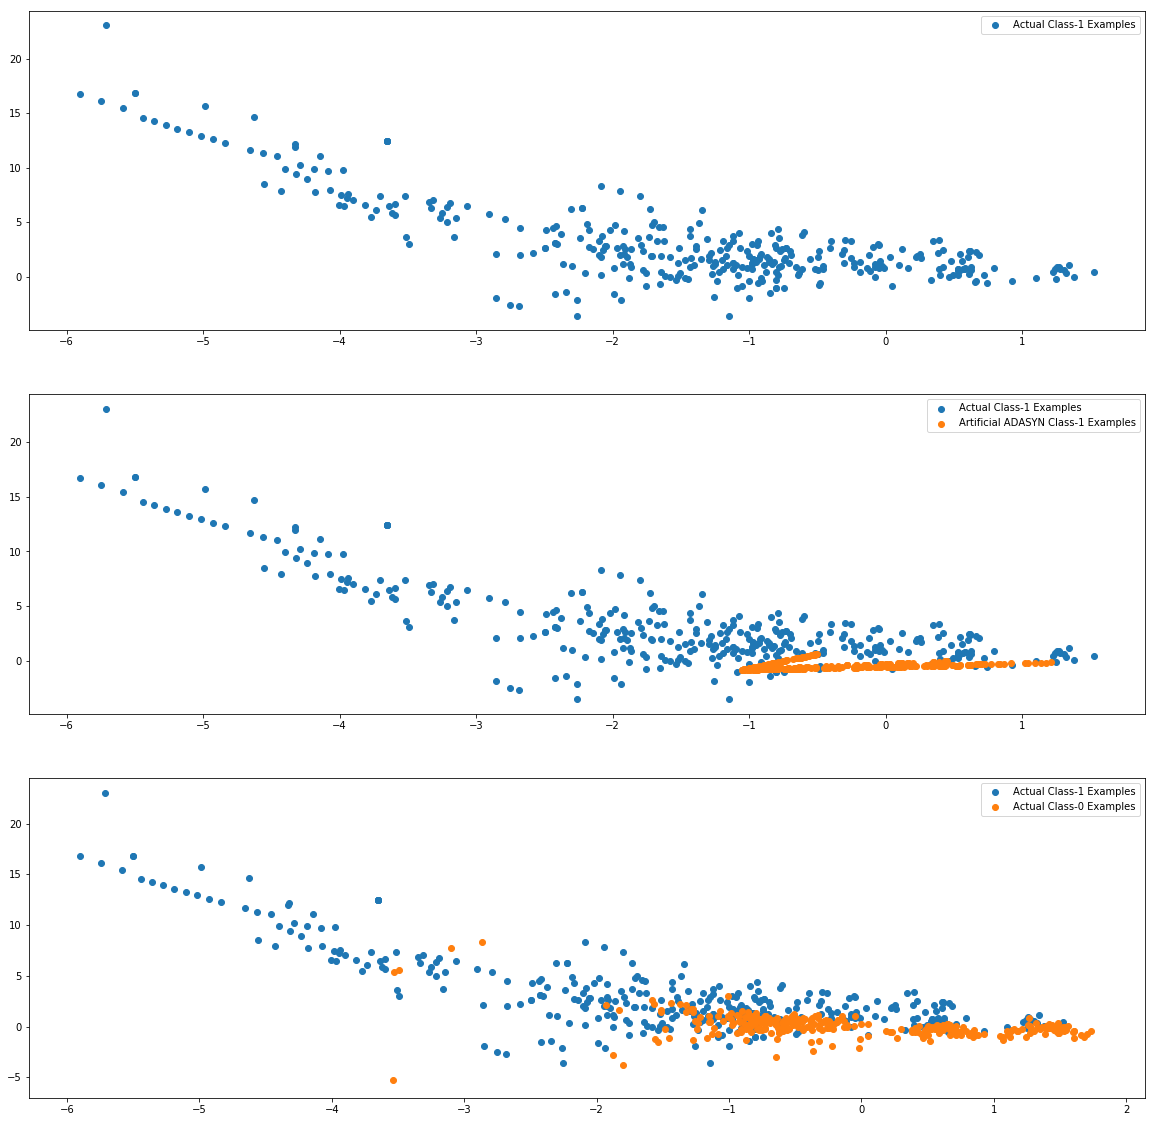

In [178]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [179]:
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=X_train.columns)

In [180]:
print("% Fraud before oversampling:",(np.sum(y_train))/len(y_train)*100)
print("% Fraud after oversampling:",(np.sum(y_train_adasyn))/len(y_train_adasyn)*100)

% Fraud before oversampling: 0.1755582753155033
% Fraud after oversampling: 49.99874377540714


In [181]:
y_train_adasyn_df = pd.DataFrame(y_train_adasyn)

In [182]:
y_train_adasyn_df.head()

,0
0,0
1,0
2,0
3,0
4,0


### Logistic Regression- ADASYN

In [183]:
log_reg_adasyn=LogisticRegression(class_weight='balanced',C=0.05)
modelfit(log_reg_adasyn,X_train_adasyn, y_train_adasyn)


Model Report
AUC Score (Train): 0.968692
Accuracy : 0.8892
Recall/Sensitivity : 0.8653
Precision: 0.9087


In [184]:
# make predictions
pred_probs_test = log_reg_adasyn.predict(X_test)
pred_proba=log_reg_adasyn .predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_probs_test,pred_proba)

***SKLEARN METRICS***
ROC_AUC Score: 0.969439
sklearn accuracy score value: 0.9111688494083775
sklearn recall score value: 0.9436619718309859
sklearn precision score value: 0.017366511145671334
sklearn F1 score value: 0.03410537032323747


### StratifiedKFold Cross Validation

In [185]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(log_reg_adasyn,X_train_adasyn, y_train_adasyn_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)

auc_score: 0.96866


In [186]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_adasyn_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_adasyn,y_train_adasyn_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_adasyn_cv,X_test_adasyn_cv = X_train_adasyn.loc[train_index],X_train_adasyn.loc[test_index]
    y_train_adasyn_cv,y_test_adasyn_cv = y_train_adasyn_df.loc[train_index],y_train_adasyn_df.loc[test_index]
    log_reg_adasyn.fit(X_train_adasyn_cv,y_train_adasyn_cv)
    score = metrics.roc_auc_score(y_test_adasyn_cv,log_reg_over.predict_proba(X_test_adasyn_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_adasyn = log_reg_adasyn.predict_proba(X_test)[:,1]
    pred_test_adasyn_full +=pred_test_adasyn
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9627987696317508
2 of KFold 5
ROC AUC score: 0.9644754315660389
3 of KFold 5
ROC AUC score: 0.96332452453582
4 of KFold 5
ROC AUC score: 0.9628722859545586
5 of KFold 5
ROC AUC score: 0.9636734802094488

mean_auc_score: 0.96343


### Predicting on test data

In [187]:
pred_probs_adasyn = pred_test_adasyn_full/5
y_test_adasyn_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_adasyn})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_adasyn_df['final_predicted'] = y_test_adasyn_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [188]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_adasyn_df.fraud,y_test_adasyn_df.final_predicted,y_test_adasyn_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.969436
sklearn accuracy score value: 0.6235033882237281
sklearn recall score value: 0.971830985915493
sklearn precision score value: 0.004272049035693279
sklearn F1 score value: 0.00850670365233472


### Decision Tree- ADASYN

In [189]:
dt_adasyn = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=150,
                             min_samples_leaf=10,
                             max_depth=8,
                             random_state=10)
modelfit(dt_adasyn, X_train_adasyn, y_train_adasyn)


Model Report
AUC Score (Train): 0.958110
Accuracy : 0.89
Recall/Sensitivity : 0.8113
Precision: 0.9629


In [190]:
# make predictions
pred_test= dt_adasyn.predict(X_test)
pred_proba_test=dt_adasyn.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.900446
sklearn accuracy score value: 0.966726355582084
sklearn recall score value: 0.823943661971831
sklearn precision score value: 0.03986371379897785
sklearn F1 score value: 0.07604809879753005


### StratifiedKFold Cross Validation

In [191]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dt_adasyn,X_train_adasyn, y_train_adasyn_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.97096


In [192]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_adasyn_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_adasyn,y_train_adasyn_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_adasyn_cv,X_test_adasyn_cv = X_train_adasyn.loc[train_index],X_train_adasyn.loc[test_index]
    y_train_adasyn_cv,y_test_adasyn_cv = y_train_adasyn_df.loc[train_index],y_train_adasyn_df.loc[test_index]
    dt_adasyn.fit(X_train_adasyn_cv,y_train_adasyn_cv)
    score = metrics.roc_auc_score(y_test_adasyn_cv,dt_adasyn.predict_proba(X_test_adasyn_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_adasyn = dt_adasyn.predict_proba(X_test)[:,1]
    pred_test_adasyn_full +=pred_test_adasyn
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9762825391978183
2 of KFold 5
ROC AUC score: 0.9793558203172508
3 of KFold 5
ROC AUC score: 0.9687662833649335
4 of KFold 5
ROC AUC score: 0.9534770303125824
5 of KFold 5
ROC AUC score: 0.9769217608316947

mean_auc_score: 0.97096


### Predicting on test data

In [193]:
pred_probs_adasyn = pred_test_adasyn_full/5
y_test_adasyn_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_adasyn})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_adasyn_df['final_predicted'] = y_test_adasyn_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [194]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_adasyn_df.fraud,y_test_adasyn_df.final_predicted,y_test_adasyn_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.956229
sklearn accuracy score value: 0.6717226689137787
sklearn recall score value: 0.9577464788732394
sklearn precision score value: 0.0048262890805209555
sklearn F1 score value: 0.009604180643338865


### Random Forest -ADASYN

In [195]:
rf_adasyn=RandomForestClassifier(class_weight='balanced',
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=150,
                             max_features='auto',
                             random_state=10)
modelfit(rf_adasyn, X_train_adasyn, y_train_adasyn)


Model Report
AUC Score (Train): 0.997438
Accuracy : 0.9773
Recall/Sensitivity : 0.9762
Precision: 0.9782


In [196]:
# make predictions
pred_test= rf_adasyn.predict(X_test)
pred_proba_test=dt_adasyn.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.941441
sklearn accuracy score value: 0.9763819154289994
sklearn recall score value: 0.8380281690140845
sklearn precision score value: 0.056291390728476824
sklearn F1 score value: 0.10549645390070923


### StratifiedKFold Cross Validation

In [197]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rf_adasyn,X_train_adasyn, y_train_adasyn_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.99698


In [198]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_adasyn_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_adasyn,y_train_adasyn_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_adasyn_cv,X_test_adasyn_cv = X_train_adasyn.loc[train_index],X_train_adasyn.loc[test_index]
    y_train_adasyn_cv,y_test_adasyn_cv = y_train_adasyn_df.loc[train_index],y_train_adasyn_df.loc[test_index]
    rf_adasyn.fit(X_train_adasyn_cv,y_train_adasyn_cv)
    score = metrics.roc_auc_score(y_test_adasyn_cv,rf_adasyn.predict_proba(X_test_adasyn_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_adasyn = rf_adasyn.predict_proba(X_test)[:,1]
    pred_test_adasyn_full +=pred_test_adasyn
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.997002778444145
2 of KFold 5
ROC AUC score: 0.9970004858031732
3 of KFold 5
ROC AUC score: 0.9964774944404514
4 of KFold 5
ROC AUC score: 0.9970468262506758
5 of KFold 5
ROC AUC score: 0.9973791824177921

mean_auc_score: 0.99698


### Predicting on test data

In [199]:
pred_probs_adasyn = pred_test_adasyn_full/5
y_test_adasyn_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_adasyn})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_adasyn_df['final_predicted'] = y_test_adasyn_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [200]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_adasyn_df.fraud,y_test_adasyn_df.final_predicted,y_test_adasyn_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.968720
sklearn accuracy score value: 0.665051554837728
sklearn recall score value: 0.9647887323943662
sklearn precision score value: 0.004765051650377378
sklearn F1 score value: 0.009483265842937735


### XGBOOST-ADASYN

In [201]:
modelxgb_adasyn = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                     learning_rate=0.15,  
                     colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      min_child_weight=6,
                      reg_alpha = 0.3,
                      max_depth=8, 
                      gamma=0.3)

modelfit(modelxgb_adasyn,X_train_adasyn, y_train_adasyn)


Model Report
AUC Score (Train): 0.999996
Accuracy : 0.9998
Recall/Sensitivity : 1
Precision: 0.9996


In [202]:
# make predictions
pred_test= modelxgb_adasyn.predict(X_test)
pred_proba_test=modelxgb_adasyn.predict_proba(X_test)[:,1]
#Let's check the model metrices.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.966319
sklearn accuracy score value: 0.9985838512224524
sklearn recall score value: 0.8098591549295775
sklearn precision score value: 0.5502392344497608
sklearn F1 score value: 0.6552706552706552


### StratifiedKFold Cross Validation

In [203]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(modelxgb_adasyn,X_train_adasyn, y_train_adasyn_df, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('auc_score: %.5f' % score)


auc_score: 0.99997


In [204]:
#perform cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_adasyn_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_adasyn,y_train_adasyn_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_adasyn_cv,X_test_adasyn_cv = X_train_adasyn.loc[train_index],X_train_adasyn.loc[test_index]
    y_train_adasyn_cv,y_test_adasyn_cv = y_train_adasyn_df.loc[train_index],y_train_adasyn_df.loc[test_index]
    modelxgb_adasyn.fit(X_train_adasyn_cv,y_train_adasyn_cv)
    score = metrics.roc_auc_score(y_test_adasyn_cv,modelxgb_adasyn.predict_proba(X_test_adasyn_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test_adasyn = modelxgb_adasyn.predict_proba(X_test)[:,1]
    pred_test_adasyn_full +=pred_test_adasyn
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9999507085347271
2 of KFold 5
ROC AUC score: 0.9999842879607862
3 of KFold 5
ROC AUC score: 0.999975106665926
4 of KFold 5
ROC AUC score: 0.9999715850128477
5 of KFold 5
ROC AUC score: 0.9999662216160952

mean_auc_score: 0.99997


### Predicting on test data

In [205]:
pred_probs_adasyn = pred_test_adasyn_full/5
y_test_adasyn_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_adasyn})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_adasyn_df['final_predicted'] = y_test_adasyn_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [206]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_adasyn_df.fraud,y_test_adasyn_df.final_predicted,y_test_adasyn_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.968616
sklearn accuracy score value: 0.9944992568144845
sklearn recall score value: 0.8450704225352113
sklearn precision score value: 0.2112676056338028
sklearn F1 score value: 0.33802816901408456


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### perform the best oversampling method on X_train & y_train


### XGBOOST with Random oversampling performed best on the dataset with 
#### Training accuracy -0.999
#### Test accuracy - 0.9845


In [207]:
from imblearn import over_sampling #- 
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_bal_sm, y_train_bal_sm = sm.fit_resample(X_train, y_train)
X_train_bal_sm = pd.DataFrame(X_train_bal_sm, columns=X_train.columns)
y_train_bal_sm_df = pd.DataFrame(y_train_bal_sm)



### HYper parameter Tuning on XGBOOST Random Sampling

In [208]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'max_depth':range(3,10,3),
     'min_child_weight':[1,4,6,8,10,12],
     'subsample' :[i/10.0 for i in range(4,10)],
     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
     'gamma':[i/10.0 for i in range(1,5)],
     #'n_estimators' : [100,120,150]
     'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]}
# Create a based model
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      min_child_weight=6,
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, 
                            cv = 3, n_jobs = 4,verbose = 1,scoring="roc_auc")

In [209]:
# Fit the grid search to the data
grid_search.fit(X_train_bal_sm, y_train_bal_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  9.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=10,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': range(3, 10, 3), 'min_child_weight': [1, 4, 6, 8, 10, 12], 'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05], 'gamma': [0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', sco

In [210]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9999881034138055 using {'subsample': 0.5, 'reg_alpha': 0.005, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.3}


In [211]:
learning_rate_best=grid_search.best_params_.get('learning_rate')
max_depth_best=grid_search.best_params_.get('max_depth')
min_child_weight_best=grid_search.best_params_.get('min_child_weight')
subsample_best=grid_search.best_params_.get('subsample')
reg_alpha_best=grid_search.best_params_.get('reg_alpha')
#n_estimators_best=grid_search.best_params_.get('n_estimators')
gamma_best=grid_search.best_params_.get('gamma')
colsample_bytree_best=grid_search.best_params_.get('colsample_bytree')



In [212]:
final_model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                     learning_rate=learning_rate_best,  
                     colsample_bytree = colsample_bytree_best,
                      subsample =subsample_best,
                      objective='binary:logistic', 
                      n_estimators=100,#n_estimators_best, 
                      min_child_weight=min_child_weight_best,
                      reg_alpha = reg_alpha_best,
                      max_depth=max_depth_best, 
                      gamma=gamma_best)


#### Random Forest on SMOTE balanced dataset with best hyper parameters

In [213]:
# perform the best oversampling method on X_train & y_train

clf = final_model  #initialise the model with optimum hyperparameters
clf.fit(X_train_bal_sm,y_train_bal_sm) # fit on the balanced dataset


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
       learning_rate=0.15, max_delta_step=0, max_depth=9,
       min_child_weight=4, missing=None, n_estimators=120, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.5, verbosity=1)

### TRAINING ACCURACY

In [214]:
# make predictions
pred_train = clf.predict(X_train_bal_sm)
pred_proba_train=clf.predict_proba(X_train_bal_sm)[:,1]

In [215]:
#print the evaluation score on the X_test by choosing the best evaluation metric.
getModelMetrics(y_train_bal_sm,pred_train,pred_proba_train)

***SKLEARN METRICS***
ROC_AUC Score: 1.000000
sklearn accuracy score value: 0.9999547770508608
sklearn recall score value: 1.0
sklearn precision score value: 0.9999095622814422
sklearn F1 score value: 0.9999547790958834


### TEST ACCURACY

In [216]:
# make predictions
pred_test = clf.predict(X_test)
pred_proba_test=clf.predict_proba(X_test)[:,1]

In [217]:
#print the evaluation score on the X_test by choosing the best evaluation metric.
getModelMetrics(y_test,pred_test,pred_proba_test)

***SKLEARN METRICS***
ROC_AUC Score: 0.978409
sklearn accuracy score value: 0.9993328885923949
sklearn recall score value: 0.8028169014084507
sklearn precision score value: 0.7972027972027972
sklearn F1 score value: 0.8


### predict with kfold

In [218]:
#perform cross validation
#clf=rf_smote_hpt
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_prob_final_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_bal_sm,y_train_bal_sm_df):
    print('{} of KFold {}'.format(i,kf.n_splits))
    X_train_bal_sm_cv,X_test_bal_sm_cv = X_train_bal_sm.loc[train_index],X_train_bal_sm.loc[test_index]
    y_train_bal_sm_cv,y_test_bal_sm_cv = y_train_bal_sm_df.loc[train_index],y_train_bal_sm_df.loc[test_index]
    clf.fit(X_train_bal_sm_cv,y_train_bal_sm_cv)
    score = metrics.roc_auc_score(y_test_bal_sm_cv,clf.predict_proba(X_test_bal_sm_cv)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_prob_final = clf.predict_proba(X_test)[:,1]
    pred_prob_final_full +=pred_prob_final
    i+=1
    
print('\nmean_auc_score: %.5f' % np.mean(cv_score))    

1 of KFold 5
ROC AUC score: 0.9999693210565439
2 of KFold 5
ROC AUC score: 0.9999975780778116
3 of KFold 5
ROC AUC score: 0.9999868722601843
4 of KFold 5
ROC AUC score: 0.9999868085087794
5 of KFold 5
ROC AUC score: 0.9999879364918555

mean_auc_score: 0.99999


### Predicting on test data

In [219]:
pred_test_final = pred_prob_final_full/5
y_test_final_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_test_final})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_final_df['final_predicted'] = y_test_final_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Evaluation metrices

In [220]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_final_df.fraud,y_test_final_df.final_predicted,y_test_final_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.981122
sklearn accuracy score value: 0.9993328885923949
sklearn recall score value: 0.8169014084507042
sklearn precision score value: 0.7891156462585034
sklearn F1 score value: 0.8027681660899654


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 11
3rd Top var = 10


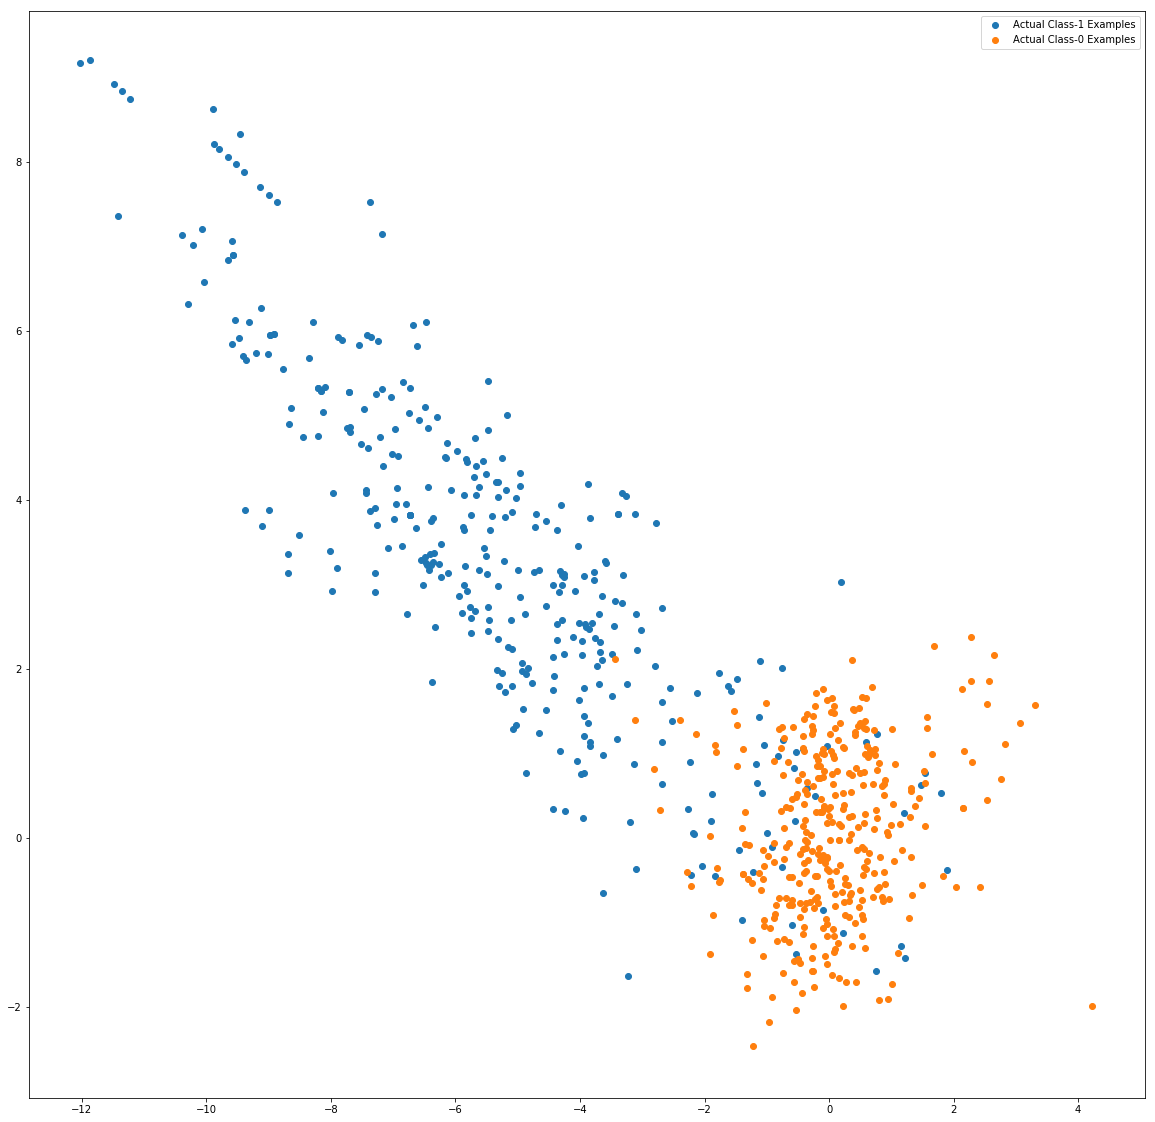

In [221]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### DRAW ROC CURVE with best model

#### Print the FPR,TPR & select the best threshold from the roc curve

In [222]:
print('Train auc =', metrics.roc_auc_score(y_train_bal_sm,pred_proba_train))
fpr, tpr, thresholds = metrics.roc_curve(y_train_bal_sm,pred_proba_train)
best_threshold = thresholds[np.argmax(tpr-fpr)]
print(best_threshold)

Train auc = 0.9999998702993035
0.99695826


#### TRAINING ACCURACY AND METRICS

In [223]:
cut_off_prob=0.5
y_train_df = predictFraudWithProb(clf,X_train_bal_sm,y_train_bal_sm,cut_off_prob)
y_train_df.head()

***SKLEARN METRICS***
ROC_AUC Score: 0.999997
sklearn accuracy score value: 0.9999447275066076
sklearn recall score value: 1.0
sklearn precision score value: 0.9998894672320585
sklearn F1 score value: 0.9999447305614872


,fraud,fraud_Prob,final_predicted
0,0,0.000513,0
1,0,0.000033,0
2,0,0.000010,0
3,0,0.000188,0
4,0,0.000027,0


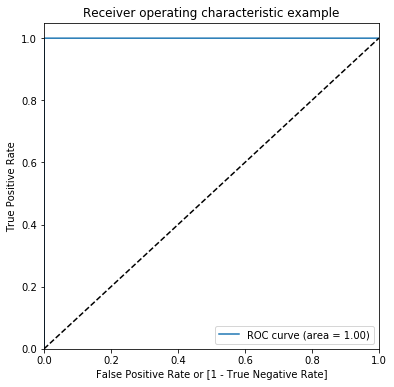

(array([0.        , 0.        , 0.        , ..., 0.99998995, 0.99999498,
        1.        ]),
 array([0.        , 0.00281387, 0.00579356, ..., 1.        , 1.        ,
        1.        ]),
 array([1.9999973e+00, 9.9999726e-01, 9.9999690e-01, ..., 1.5462050e-06,
        1.4521514e-06, 1.3975942e-06], dtype=float32))

In [224]:
draw_roc(y_train_df.fraud, y_train_df.fraud_Prob)

     prob  accuracy  sensi     speci
0.0   0.0  0.500000    1.0  0.000000
0.1   0.1  0.999809    1.0  0.999618
0.2   0.2  0.999897    1.0  0.999794
0.3   0.3  0.999912    1.0  0.999824
0.4   0.4  0.999927    1.0  0.999854
0.5   0.5  0.999945    1.0  0.999889
0.6   0.6  0.999945    1.0  0.999889
0.7   0.7  0.999952    1.0  0.999905
0.8   0.8  0.999965    1.0  0.999930
0.9   0.9  0.999970    1.0  0.999940


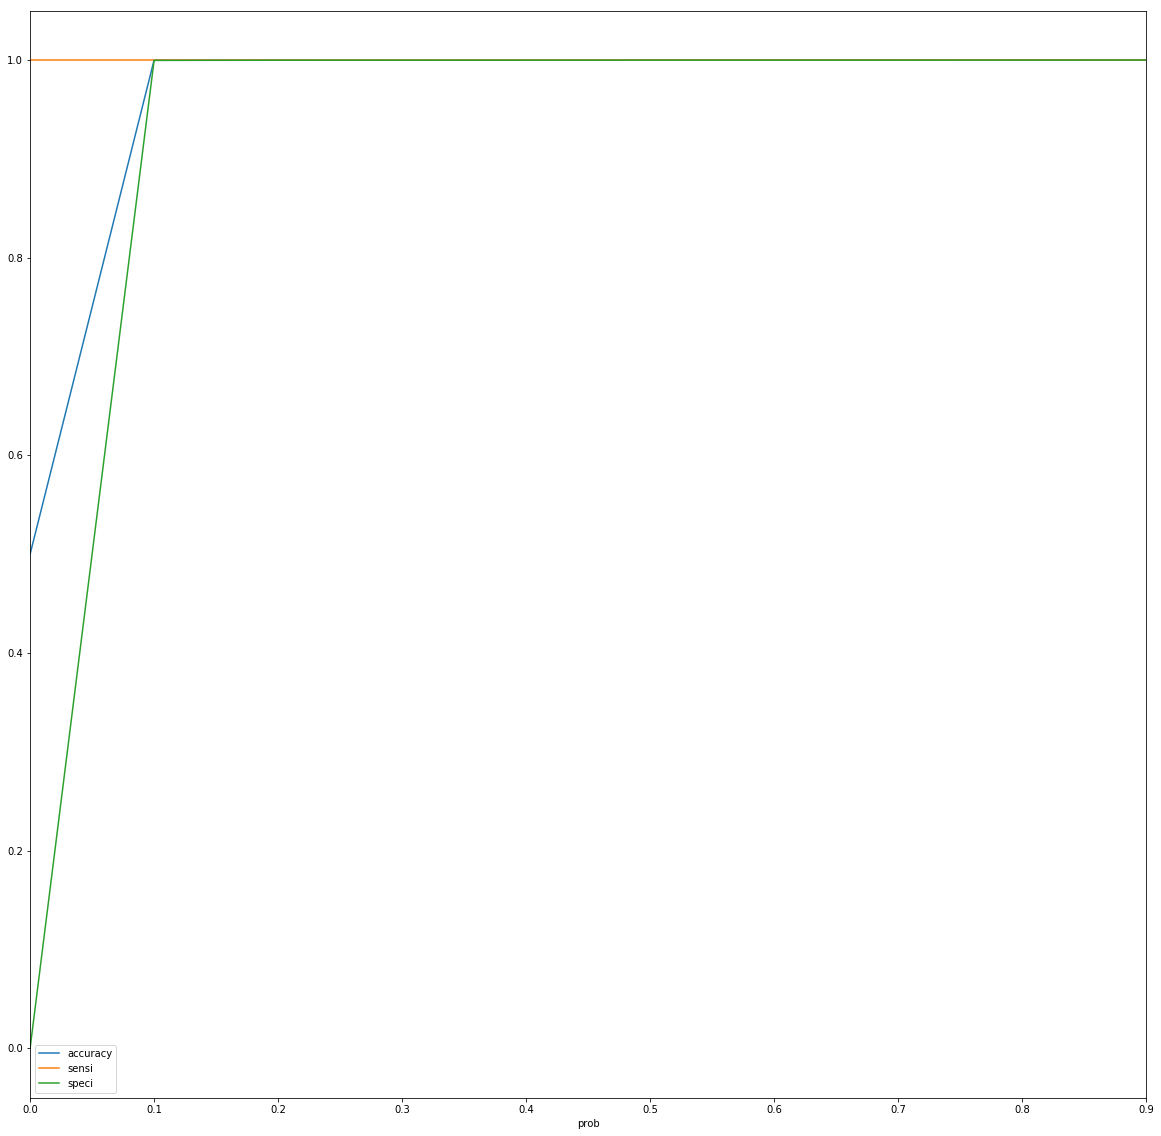

In [225]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [226]:
# predicting with the choosen cut-off on train
cut_off_prob = best_threshold
print("Best threshold" ,best_threshold)
y_train_pred=predictFraudWithProb(clf,X_train_bal_sm,y_train_bal_sm,cut_off_prob)
y_train_pred.head()

Best threshold 0.99695826
***SKLEARN METRICS***
ROC_AUC Score: 0.999997
sklearn accuracy score value: 0.9999899504557468
sklearn recall score value: 1.0
sklearn precision score value: 0.9999799013154589
sklearn F1 score value: 0.9999899505567391


,fraud,fraud_Prob,final_predicted
0,0,0.000513,0
1,0,0.000033,0
2,0,0.000010,0
3,0,0.000188,0
4,0,0.000027,0


In [255]:
# predicting with the training threshold on test
y_test_pred=predictFraudWithProb(clf,X_test,y_test,best_threshold)
y_test_pred.head()

***SKLEARN METRICS***
ROC_AUC Score: 0.978714
sklearn accuracy score value: 0.9993562960102056
sklearn recall score value: 0.6619718309859155
sklearn precision score value: 0.9306930693069307
sklearn F1 score value: 0.7736625514403292


,fraud,fraud_Prob,final_predicted
49089,0,0.000057,0
154704,0,0.000027,0
67247,0,0.000030,0
251657,0,0.000026,0
201903,0,0.002865,0


In [256]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_pred.fraud,y_test_pred.final_predicted,y_test_pred.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.978714
sklearn accuracy score value: 0.9993562960102056
sklearn recall score value: 0.6619718309859155
sklearn precision score value: 0.9306930693069307
sklearn F1 score value: 0.7736625514403292


#### Recall  Not good  for test data at this threshold

### Predicting on test data with cutoff- 0.5

In [257]:
pred_probs_final = pred_prob_final_full/5
y_test_final_df= pd.DataFrame({'fraud':y_test, 'fraud_Prob':pred_probs_final})
# Creating new column 'predicted' with 1 if fraud_Prob>0.1 else 0
y_test_final_df['final_predicted'] = y_test_final_df.fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [258]:
pred_probs_final.shape

(85443,)

In [259]:
X_test.shape

(85443, 29)

In [260]:
y_test.shape

(85443,)

### Evaluation metrices

In [261]:
#Let's see the metices
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_over, pred_probs_over))
getModelMetrics(y_test_final_df.fraud,y_test_final_df.final_predicted,y_test_final_df.fraud_Prob)

***SKLEARN METRICS***
ROC_AUC Score: 0.981122
sklearn accuracy score value: 0.9993328885923949
sklearn recall score value: 0.8169014084507042
sklearn precision score value: 0.7891156462585034
sklearn F1 score value: 0.8027681660899654


In [262]:
confusion = metrics.confusion_matrix(y_test_final_df.fraud,y_test_final_df.final_predicted)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[85270    31]
 [   26   116]]


## Cost-Benefit Analysis

In [263]:
confusion = metrics.confusion_matrix(y_test_final_df.fraud,y_test_final_df.final_predicted)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[85270    31]
 [   26   116]]


In [264]:
print("Total fraud predictions (TP + FP):", TP+FP)

Total fraud predictions (TP + FP): 147


#### total savings= (TP x cost of each transaction (correct predictions) -[ (TP+FP) x 10 + FN x Cost of all transactions (incorrect predictions)] 

#### Final dataset

In [235]:
y_test_final_df.head()

,fraud,fraud_Prob,final_predicted
49089,0,0.000061,0
154704,0,0.000069,0
67247,0,0.000042,0
251657,0,0.000037,0
201903,0,0.003993,0


In [236]:
y_test_final_df['Amount']=test_amount_df

In [237]:
y_test_final_df.describe()

,fraud,fraud_Prob,final_predicted,Amount
count,85443.000000,85443.000000,85443.000000,85443.000000
mean,0.001662,0.001930,0.001720,87.028563
std,0.040733,0.040080,0.041443,250.746101
min,0.000000,0.000002,0.000000,0.000000
25%,0.000000,0.000022,0.000000,5.520000
50%,0.000000,0.000043,0.000000,21.900000
75%,0.000000,0.000100,0.000000,76.070000
max,1.000000,0.999995,1.000000,25691.160000


In [238]:
y_test_final_df[y_test_final_df.fraud==1].shape

(142, 4)

In [239]:
y_test.sum()

142

In [240]:
y_test_final_df[y_test_final_df.final_predicted==1].shape

(147, 4)

#### TOTAL OR ACTUAL FRAUD

In [241]:
Total_fraud=y_test_final_df[(y_test_final_df.fraud==1)]

In [242]:
Total_fraud.shape

(142, 4)

In [243]:
Total_fraud_Amt=np.sum(Total_fraud.Amount)
print(Total_fraud_Amt)

15991.82


#### CORRECTLY PREDICTED FRAUDS ie. TP

In [244]:
Correct_pred_fraud=y_test_final_df[(y_test_final_df.fraud==1) & (y_test_final_df.final_predicted==1)]

In [245]:
Correct_pred_fraud.shape

(116, 4)

In [246]:
Correct_pred_fraud_Amt=np.sum(Correct_pred_fraud.Amount)
print(Correct_pred_fraud_Amt)

11951.68


#### MISSED OUT FRAUDS - FN

In [247]:
Missed_fraud= y_test_final_df[(y_test_final_df.fraud==1) & (y_test_final_df.final_predicted==0)]

In [248]:
Missed_fraud.shape

(26, 4)

In [249]:
Missed_fraud_Amt=np.sum(Missed_fraud.Amount)
print(Missed_fraud_Amt)

4040.14


#### COST FOR CALL VERIFICATION on TP + FP

In [250]:
Call_cost=(TP + FP)*10
print(Call_cost)

1470


#### SAVINGS

In [251]:
Savings=  Correct_pred_fraud_Amt -(Call_cost + Missed_fraud_Amt )
print(Savings) 

6441.540000000001


In [252]:
print("Model could save Rs.",Savings)

Model could save Rs. 6441.540000000001
